# Group 7 Project: Latent Space Cluster Analysis
<i>Patrick Kay, Kyle Shannon, Ean Vandergraaf</i>

<b>Suggested Activities for Analysis:</b>
* Get a feel for the data by looking at specific frames and the closest other points.
* Clean your data, perhaps moving the beginning and end content of credits.
* Develop hunches and hypotheses about different characters, visual themes, etc.
* Watch or rewatch the movie and/or scour the internet for critical analysis to develop theories.
* Use clustering techniques, such as k-means, to break up scenes or themes
* Develop algorithms or methods for breaking things down scene by scene.
* Consider aggregating scenes as averages.
* Reduce the number of dimensions to explore relationships among.
* Plot timelines that have additional analysis or selective content.
* Interpret the data and analysis through group discussions.

  
<b>Goal to answering these questions:</b>
* <b>Questions about characters</b>: Who are the main characters? When are they featured or absent?
* <b>Semantic themes and motifs</b>: Are there broader themes you can find that repeat across scenes?
* <b>Outliers</b>: Are there scenes that differ greatly compared to most of the rest of the film?
* <b>Clusters</b>: How would you characterize the visual content of the film? Answering this question will likely require both clustering (e.g., k-means, t-SNE) and using your own interpretation on the results of the clustering to make sense of it.
cussions. 
it.

### 1. Take out opening credits

In [56]:
import re
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from IPython.display import Image, display

import json
moive_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

image_root = 'thumbnails_folder2large/'

embeddings = np.array([vector['embedding'] for vector in moive_embeddings[163:5386]])
#sorted_indexes = np.argsort(embeddings)
print(len(embeddings))
#print(sorted_indexes)

5223


### 2. Make clusters along chunks of the timeline

In [57]:
No_chunks = 10
chunk_embeddings = np.array_split(embeddings, No_chunks)
chunk_movie_embeddings = np.array_split(moive_embeddings[163:5386], No_chunks)

#print(chunk_embeddings)
#print(chunk_movie_embeddings)

### 3. Analyze themes within the clusters

### 4. Try to find ideal numbers of clusters

Sil Score for 0


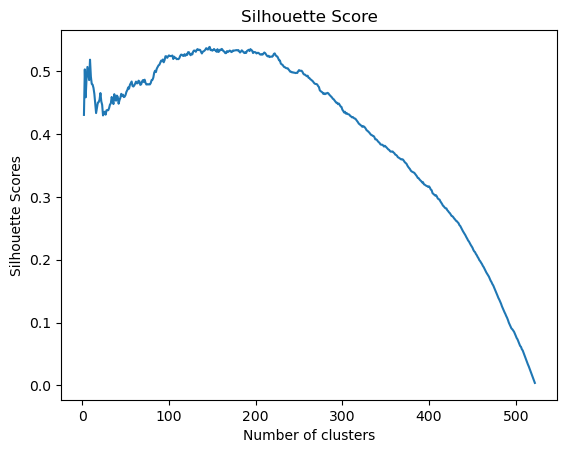

147
0.5389006
Sil Score for 1


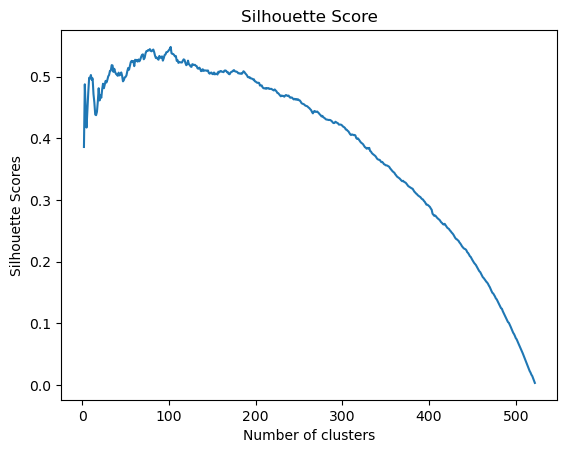

102
0.54820937
Sil Score for 2


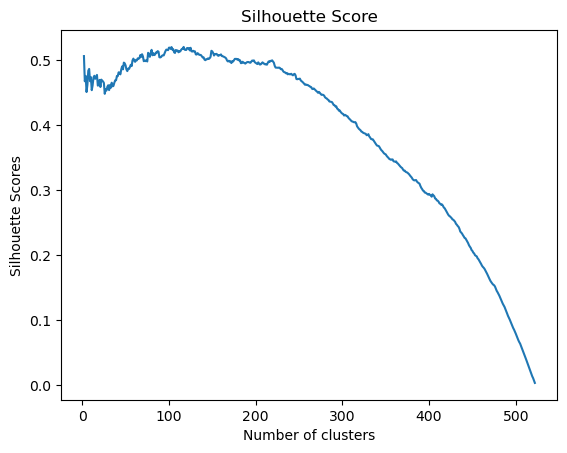

117
0.52024907
Sil Score for 3


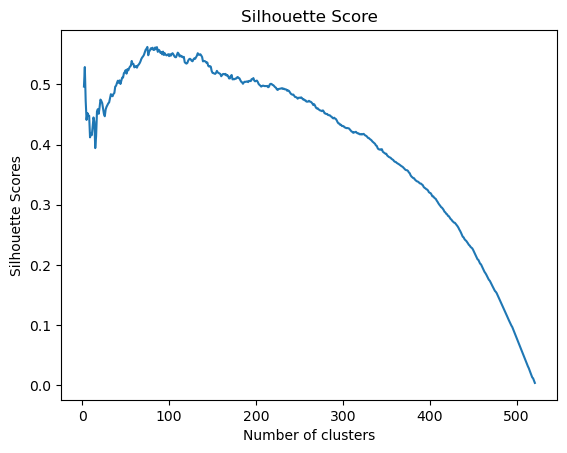

75
0.56238127
Sil Score for 4


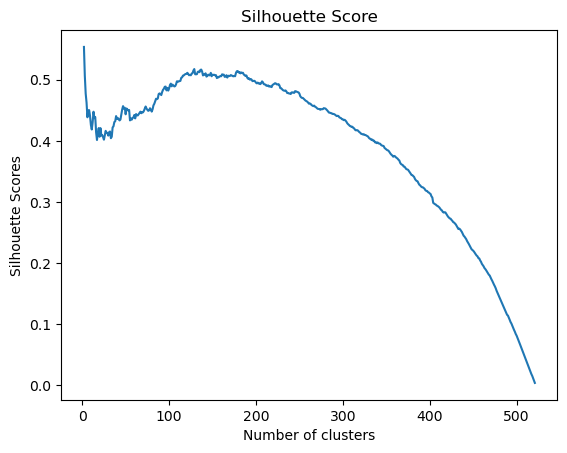

2
0.5536496
Sil Score for 5


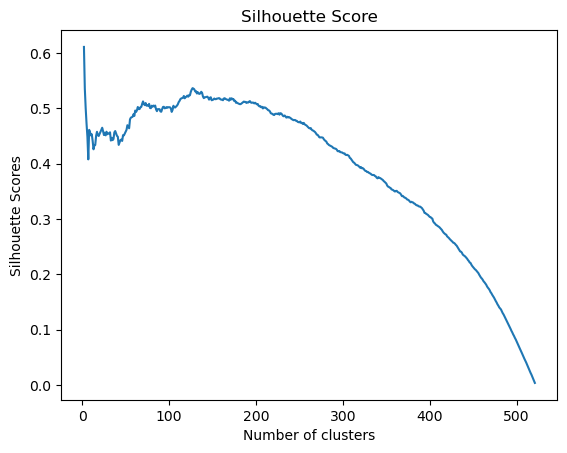

2
0.6106296
Sil Score for 6


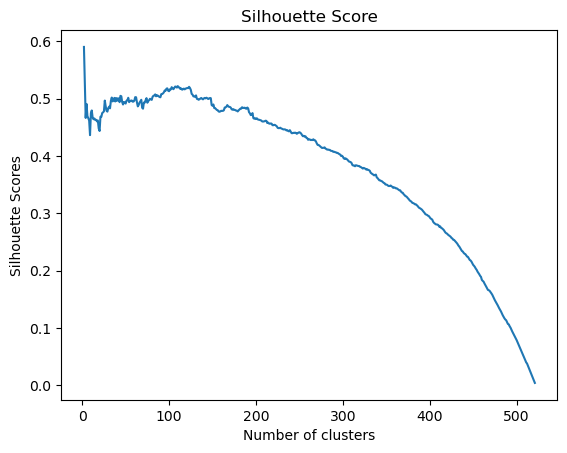

2
0.59043866
Sil Score for 7


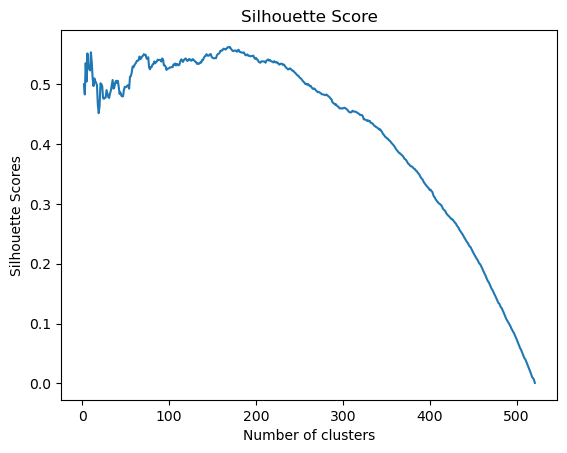

170
0.56266886
Sil Score for 8


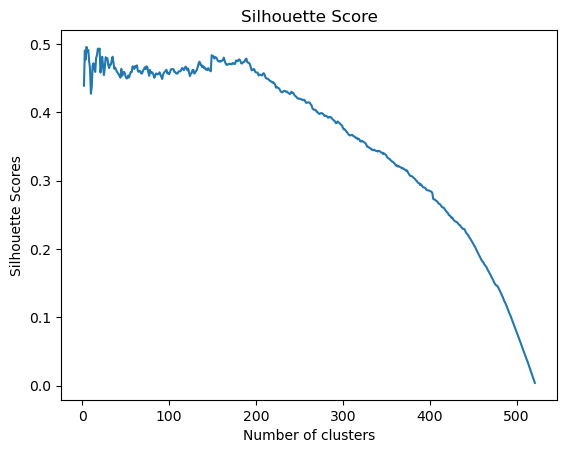

5
0.49592352
Sil Score for 9


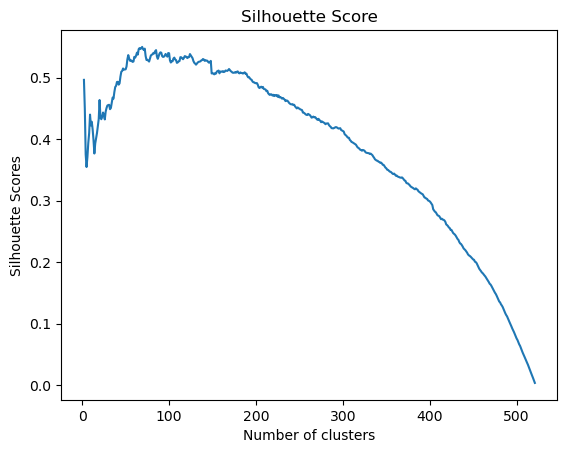

69
0.550017
[147, 102, 117, 75, 2, 2, 2, 170, 5, 69]


In [4]:
tsne = TSNE(n_components=2, random_state=42)
warnings.filterwarnings('ignore')
mx_ind_list = []

for k in range(0, No_chunks):
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])

    print("Sil Score for "+str(k))
    sil_score=[]
    maxInd = 0
    for i in range(2,len(chunk_embeddings[k])):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(chunk_vectors)
        kmeans_labels = kmeans.labels_

        sil_score.append(silhouette_score(chunk_vectors, kmeans_labels, metric = 'euclidean'))
        if i !=2:
            if sil_score[i-2] >= sil_score[maxInd]:
                maxInd = i-2
    mx_ind_list.append(maxInd+2)


    plt.plot(range(2,len(chunk_embeddings[k])),sil_score)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.show()

    print(maxInd+2)
    print(sil_score[maxInd])
print(mx_ind_list)

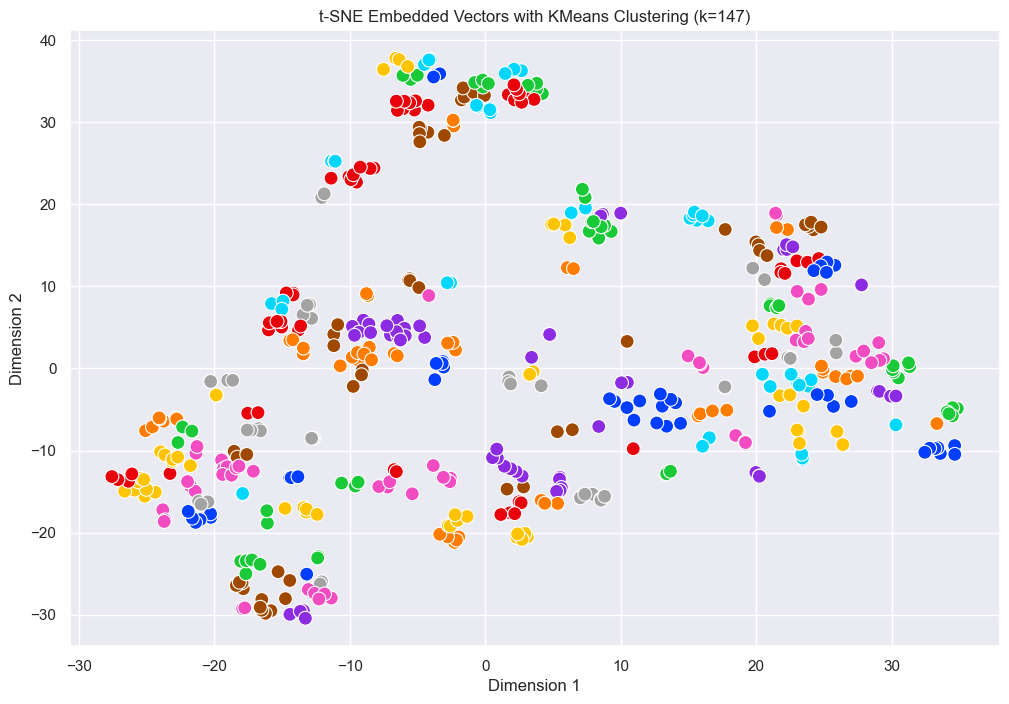

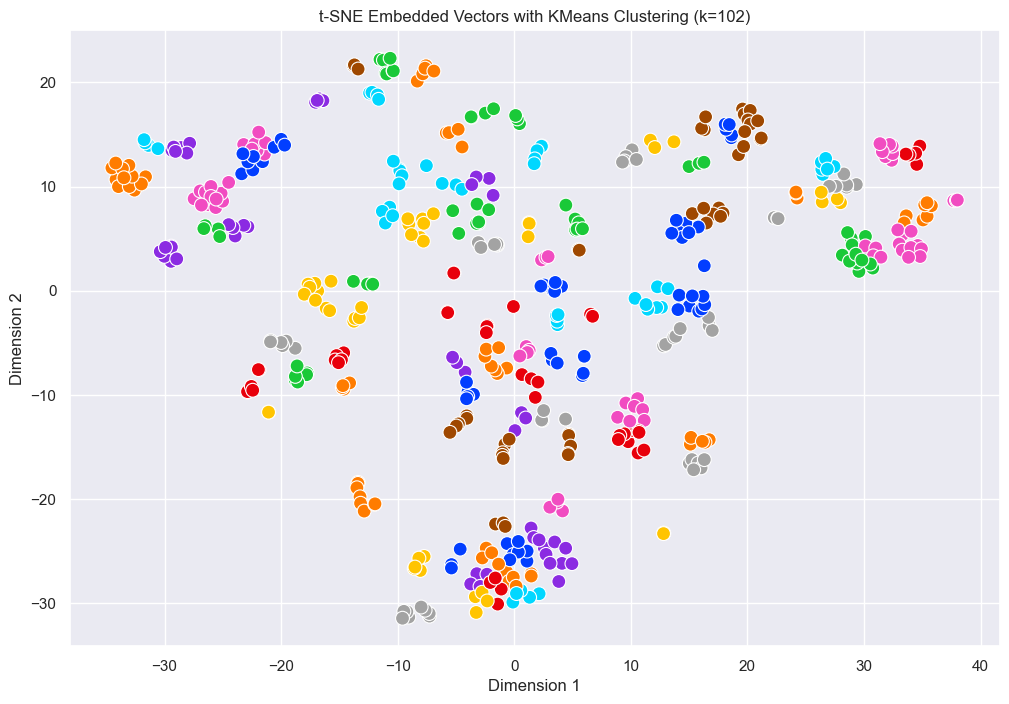

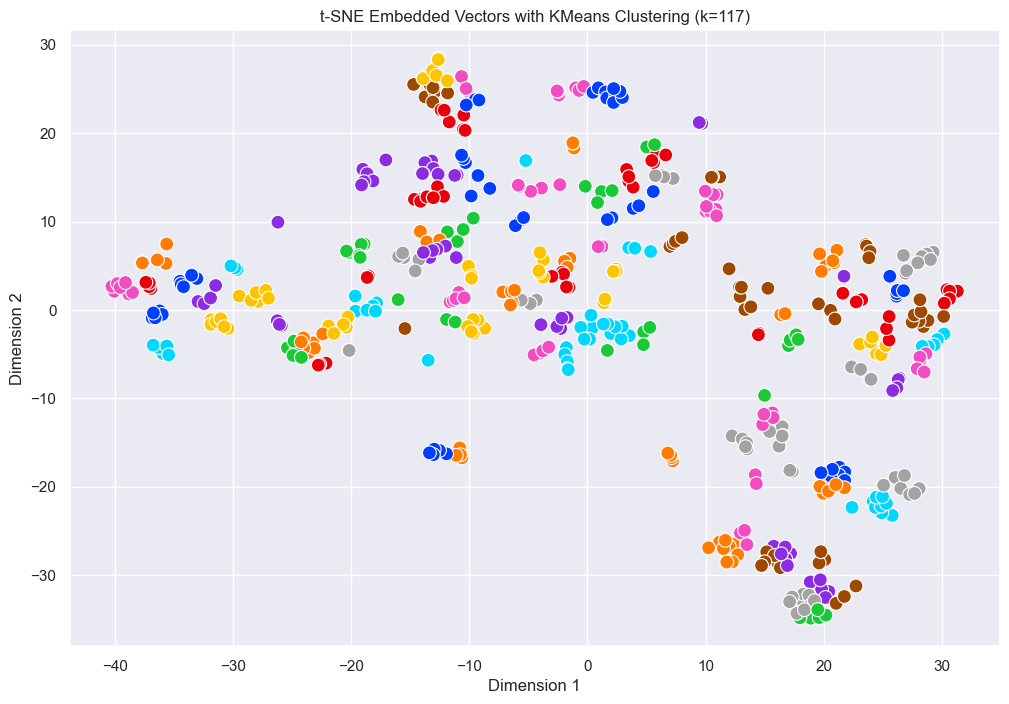

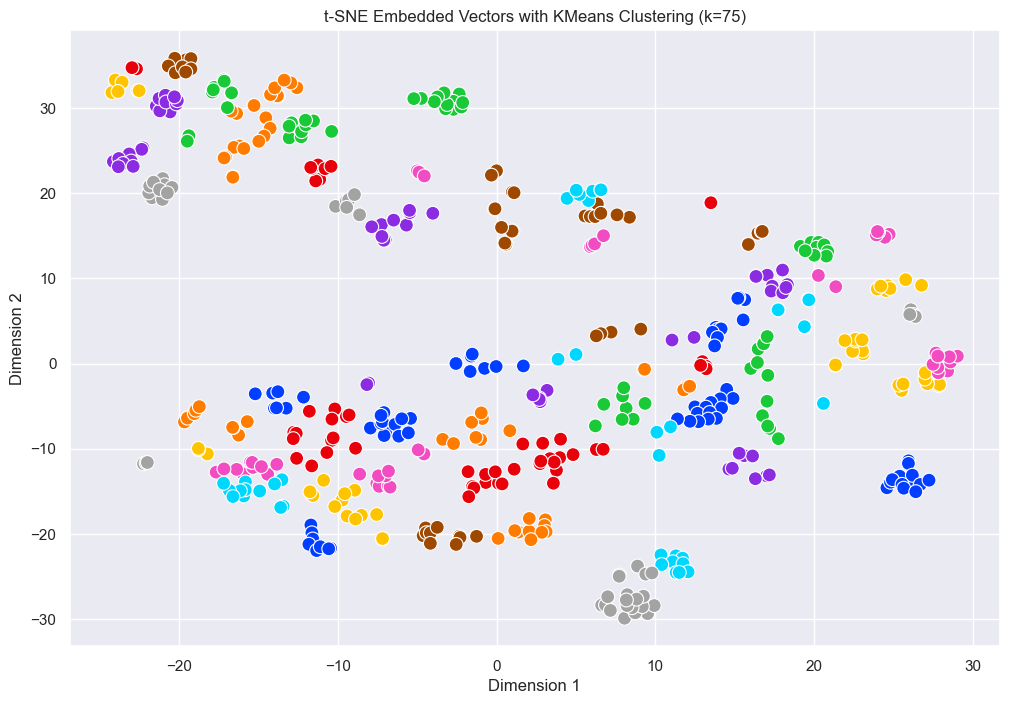

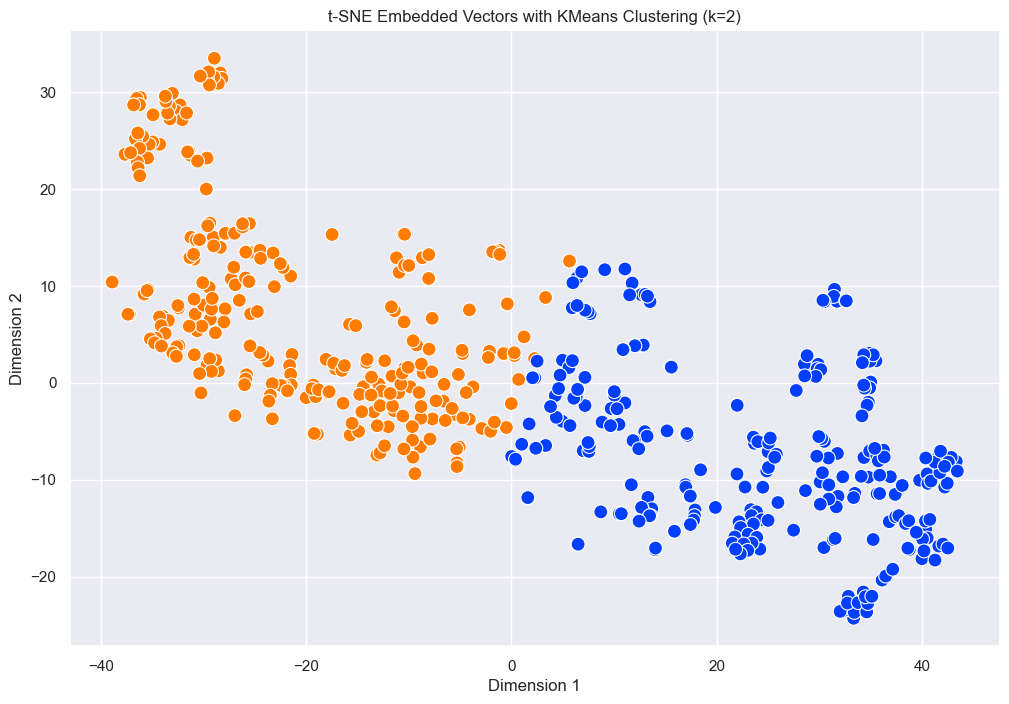

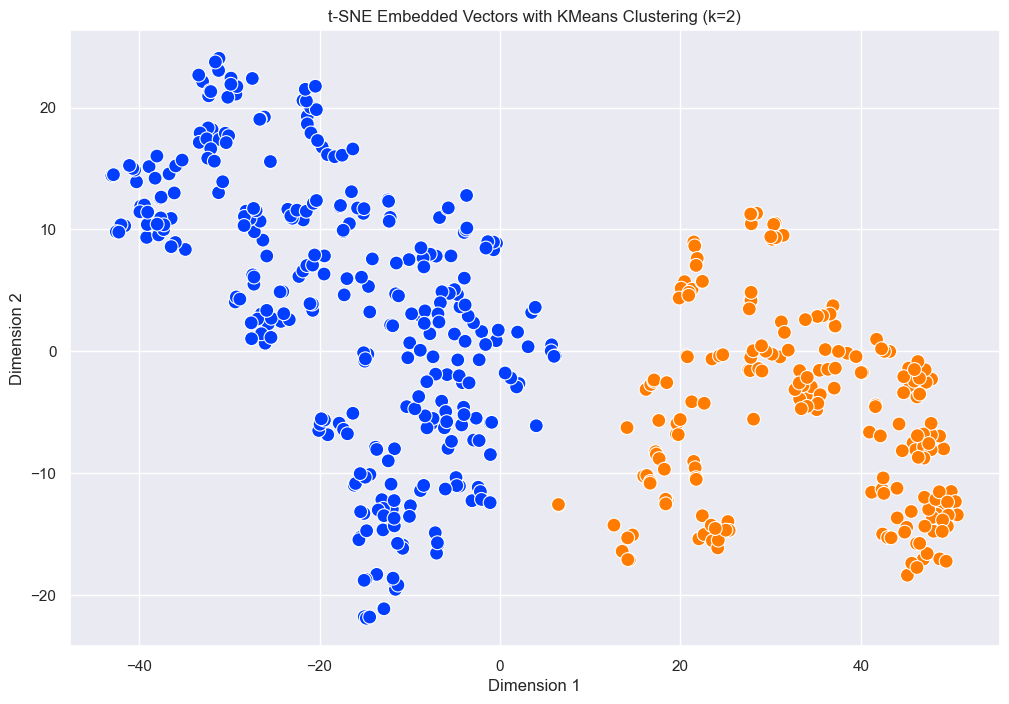

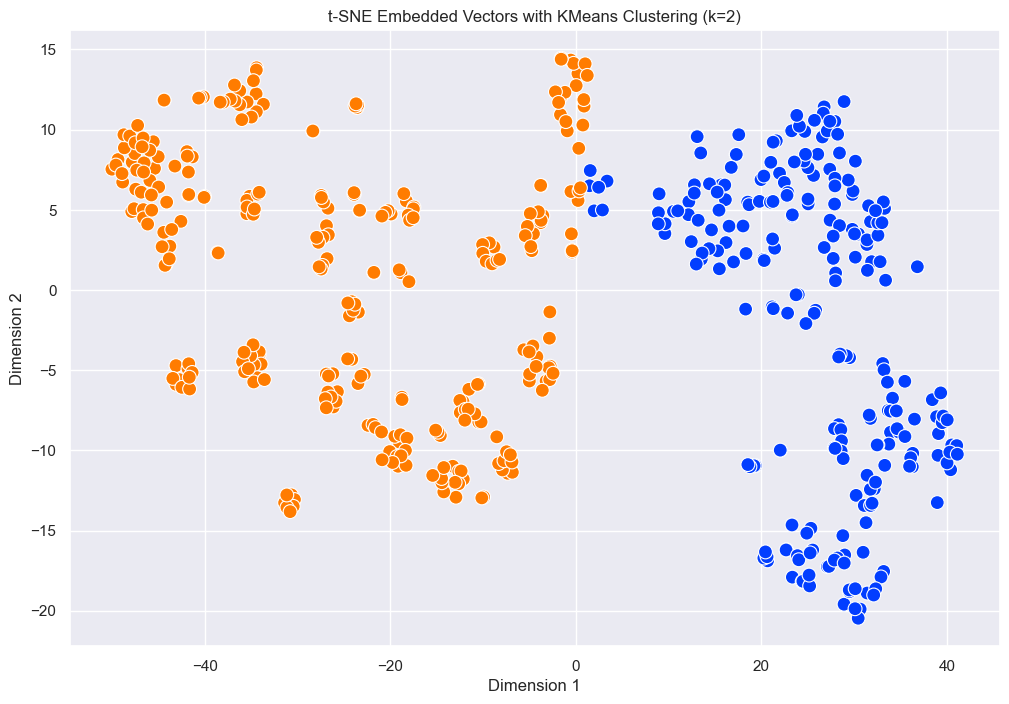

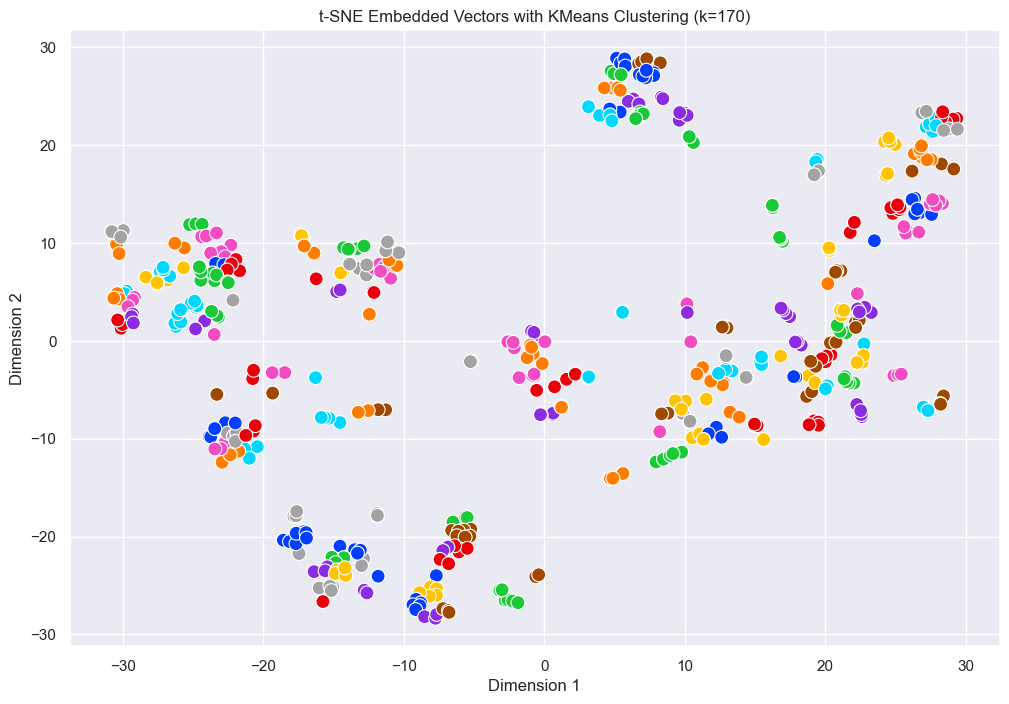

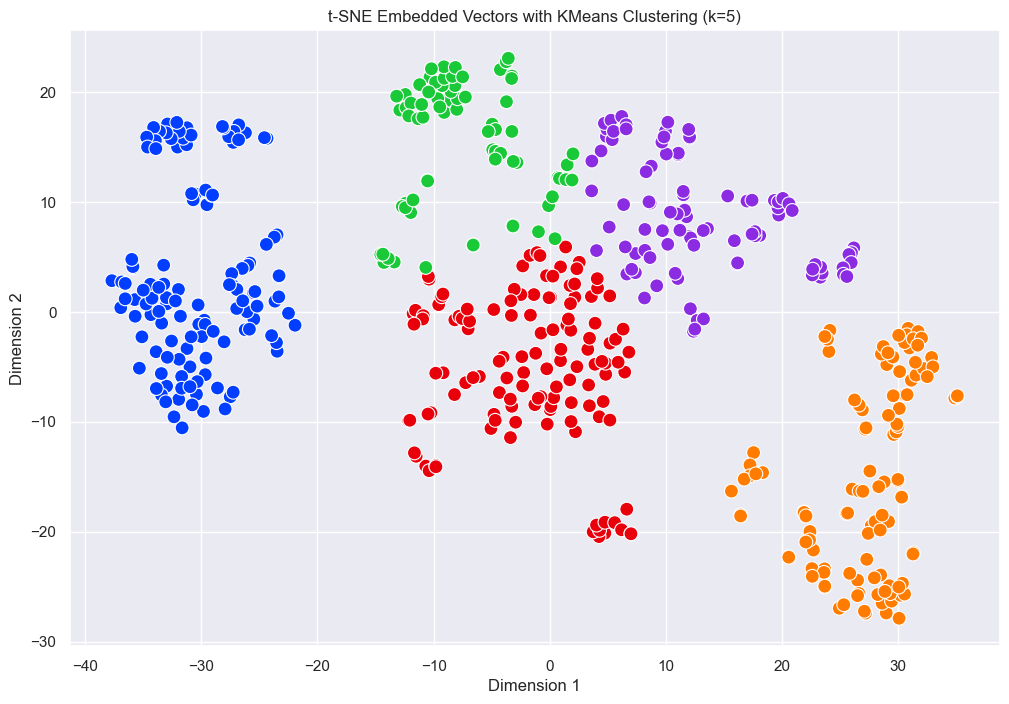

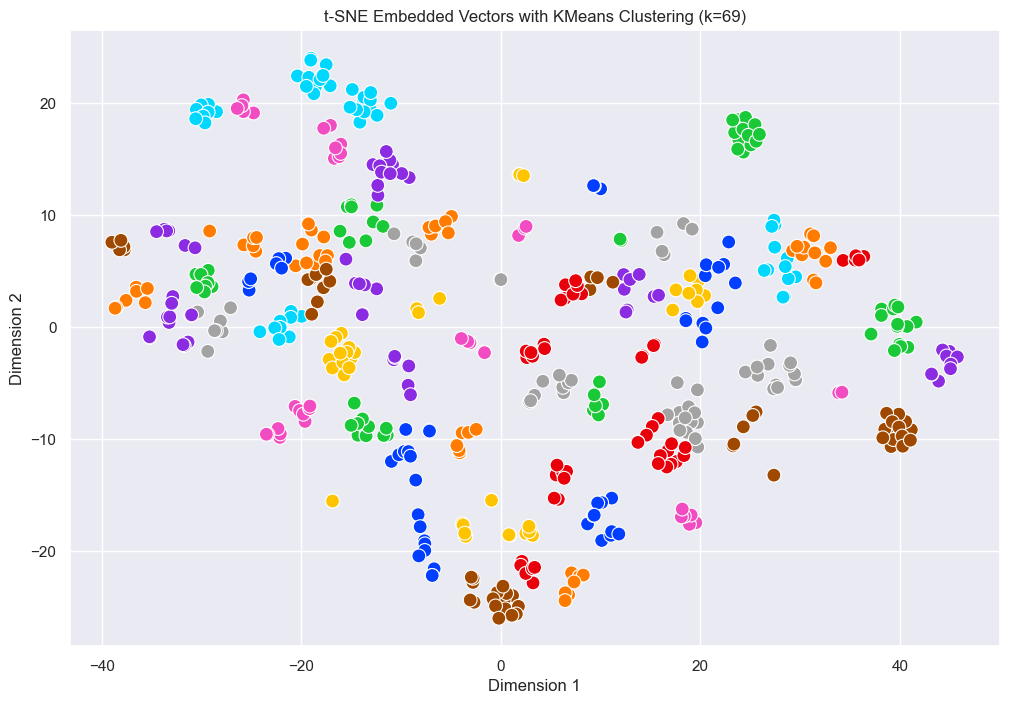

In [6]:
# Using t-SNE to embed the vectors into 2D
sorted_indexes = []
clusters = []

for k in range(0, No_chunks):
    tsne = TSNE(n_components=2, random_state=42)
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])
    sorted_indexes.append(np.argsort(chunk_embeddings[k]))

    # Performing KMeans clustering with k=12
    kmeans = KMeans(n_clusters=mx_ind_list[k], random_state=42)
    clusters.append(kmeans.fit_predict(chunk_vectors))

    # Extracting numbers from file names for labels
    #labels = [re.search(r'\d+', vector['input']).group() for vector in chunk_embeddings[0]]

    # Plotting the embedded vectors with cluster coloring
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=chunk_vectors[:, 0], y=chunk_vectors[:, 1], hue=clusters[k], palette='bright', legend=None, s=100)
    #for i, vec in enumerate(chunk_vectors):
        #plt.text(vec[0] + 0.02, vec[1] + 0.02, labels[i], fontsize=6)  # Adding labels
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-SNE Embedded Vectors with KMeans Clustering (k='+str(mx_ind_list[k])+')')
    #plt.legend(title='Cluster')
    plt.show()

In [7]:
cluster_indexes_list = []

for m in range(No_chunks):
    print(m)
    cluster_indexes = [[] for _ in range(mx_ind_list[m])]

    # Populate lists with indexes
    for i, cluster in enumerate(clusters[m]):
        #print(cluster)
        cluster_indexes[cluster].append(i)
    
    cluster_indexes_list.append(cluster_indexes)

    #for i in range(0,69):
        #print("cluster",i,len(cluster_indexes[i]))

0
1
2
3
4
5
6
7
8
9


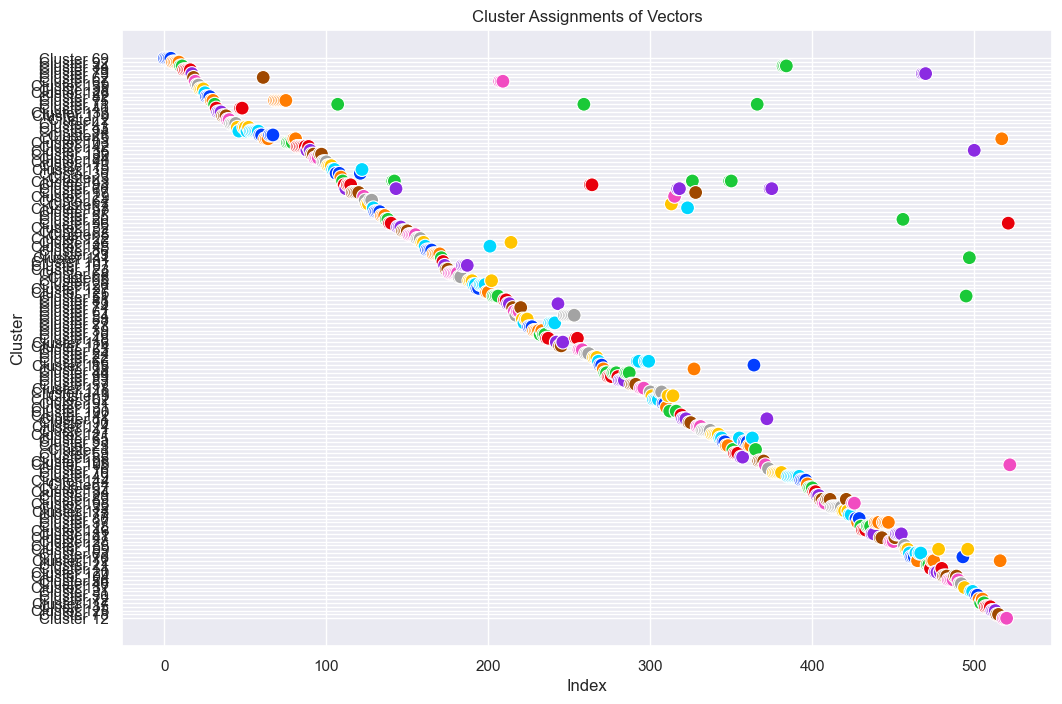

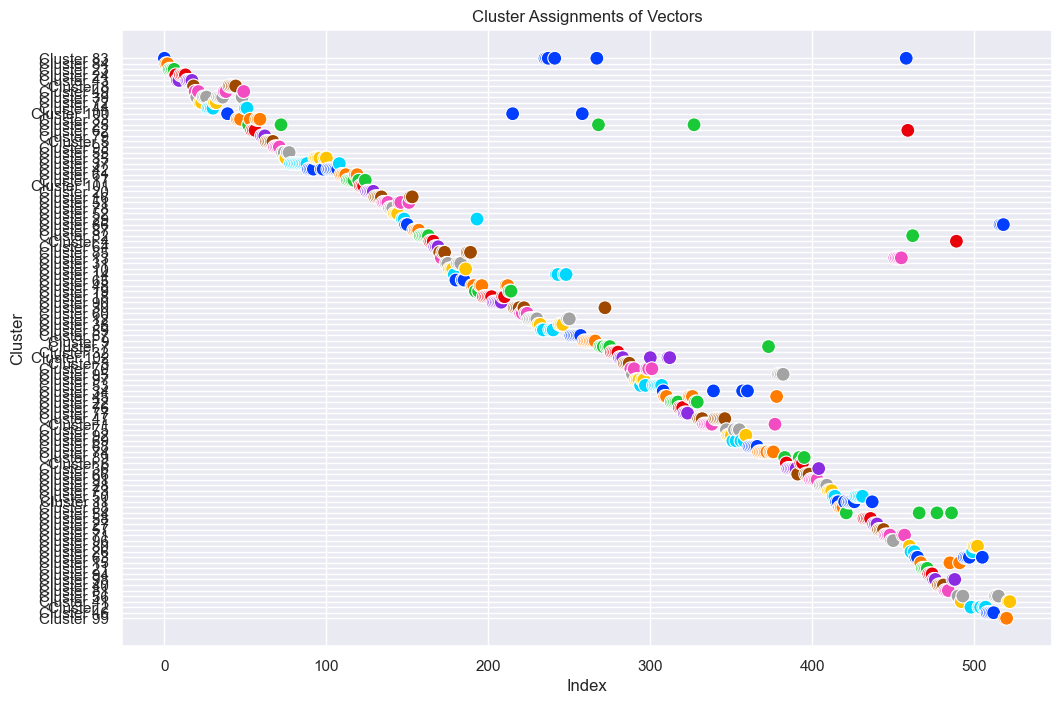

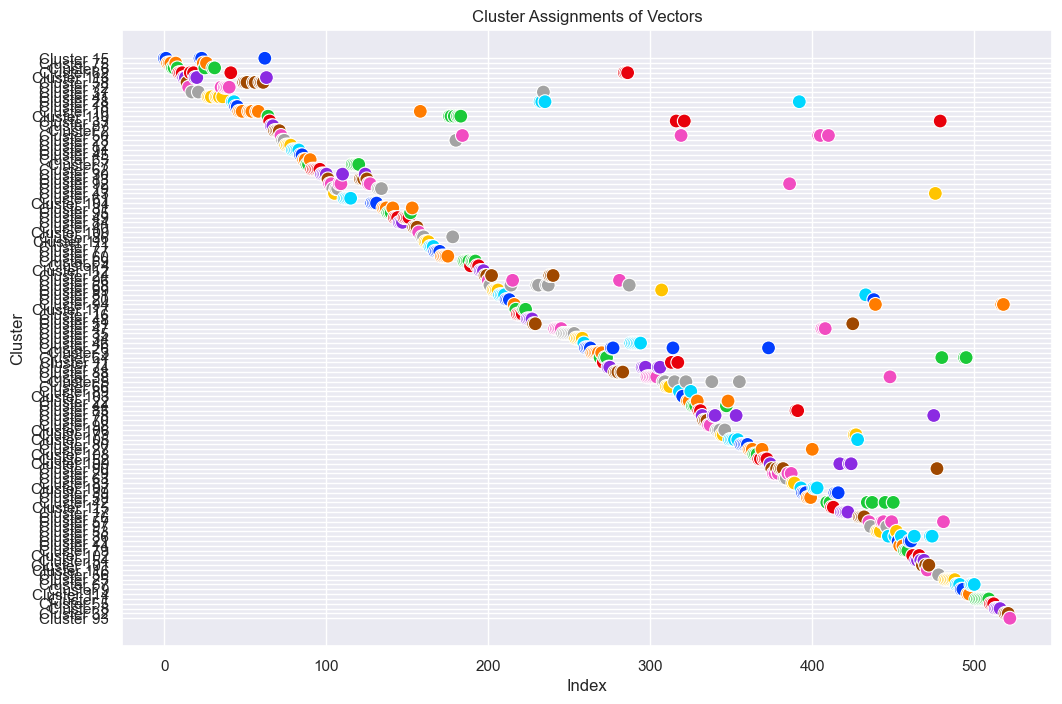

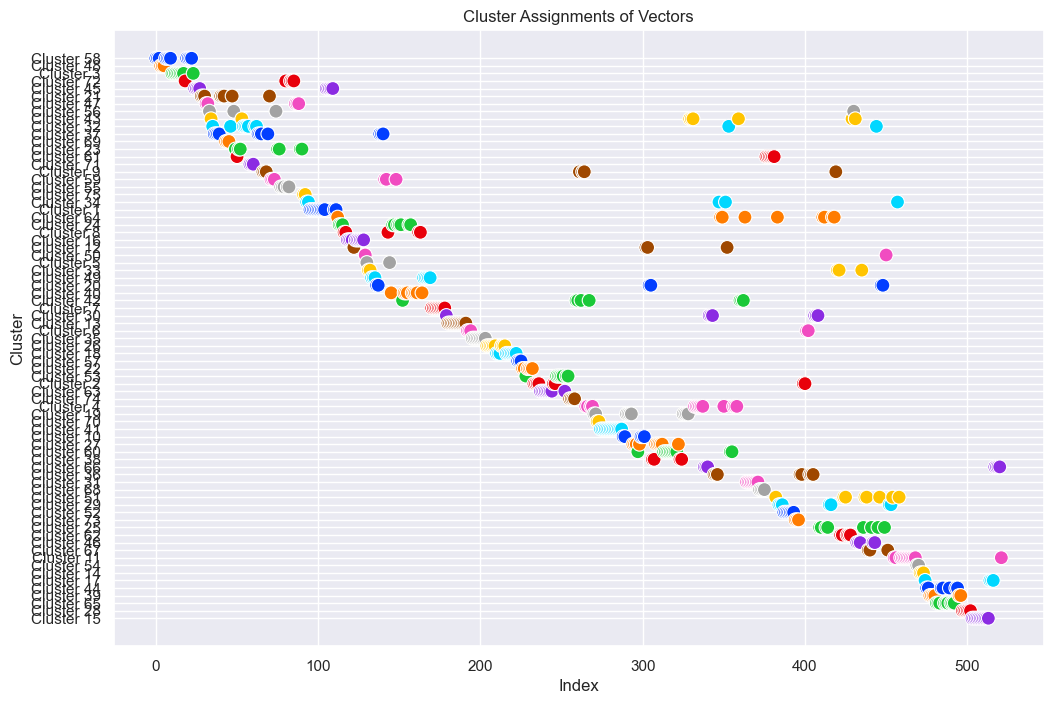

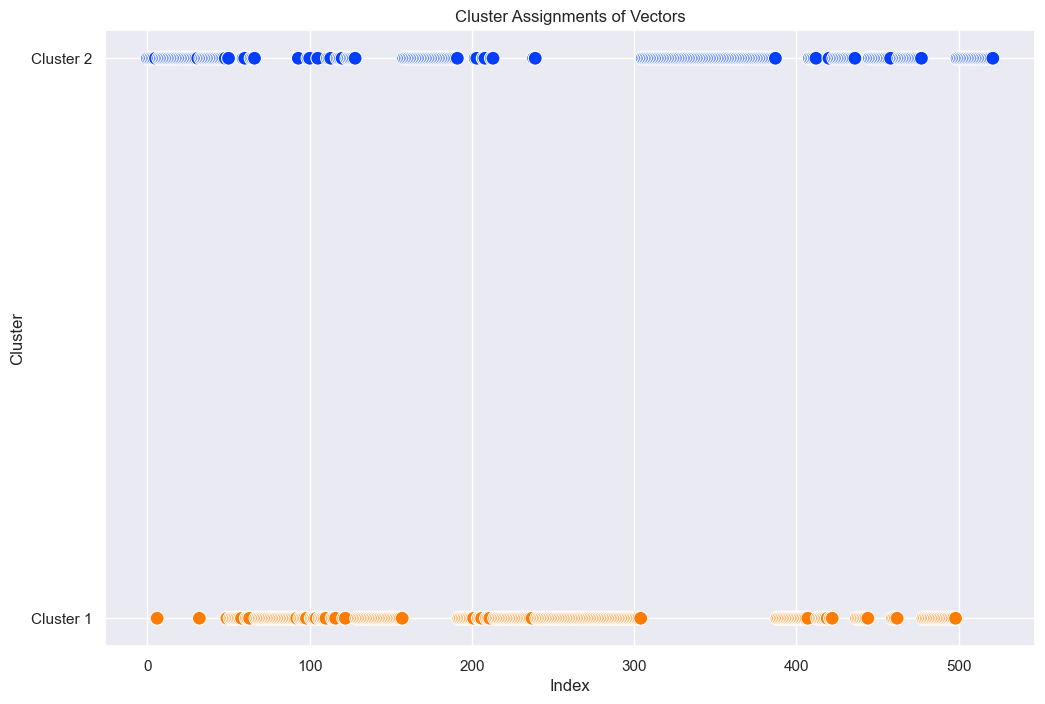

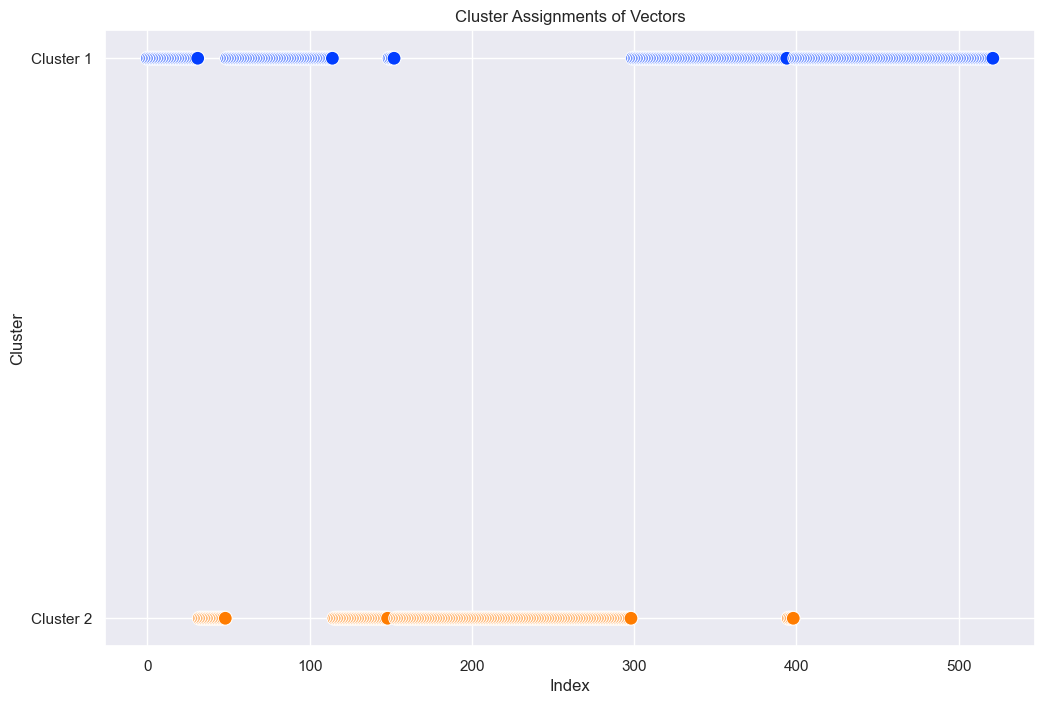

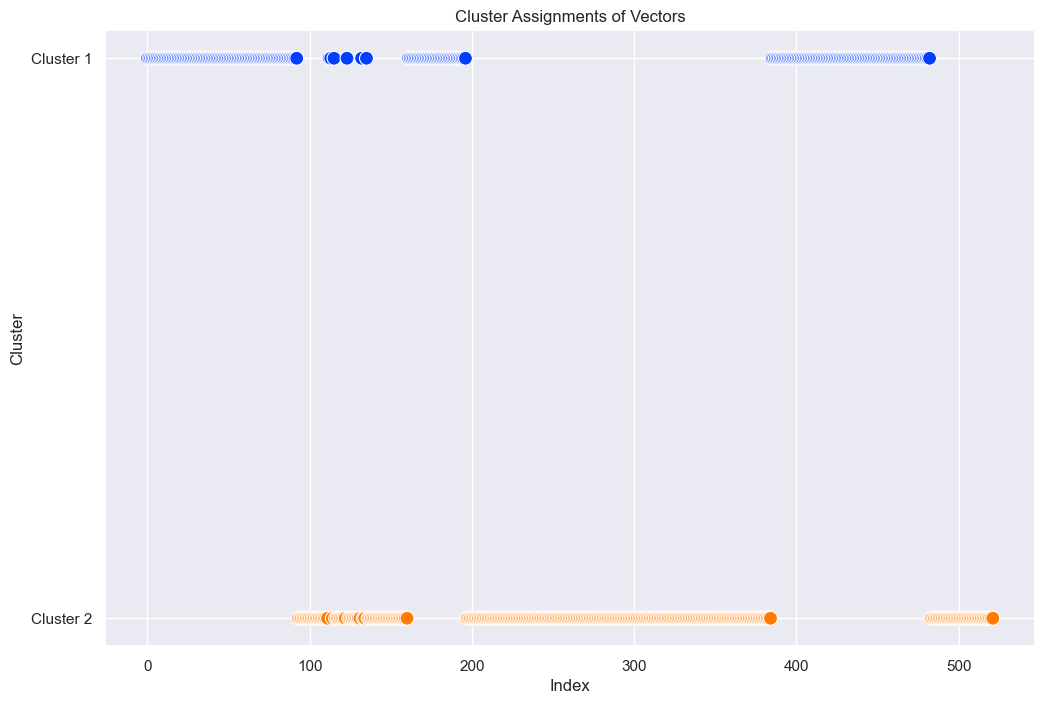

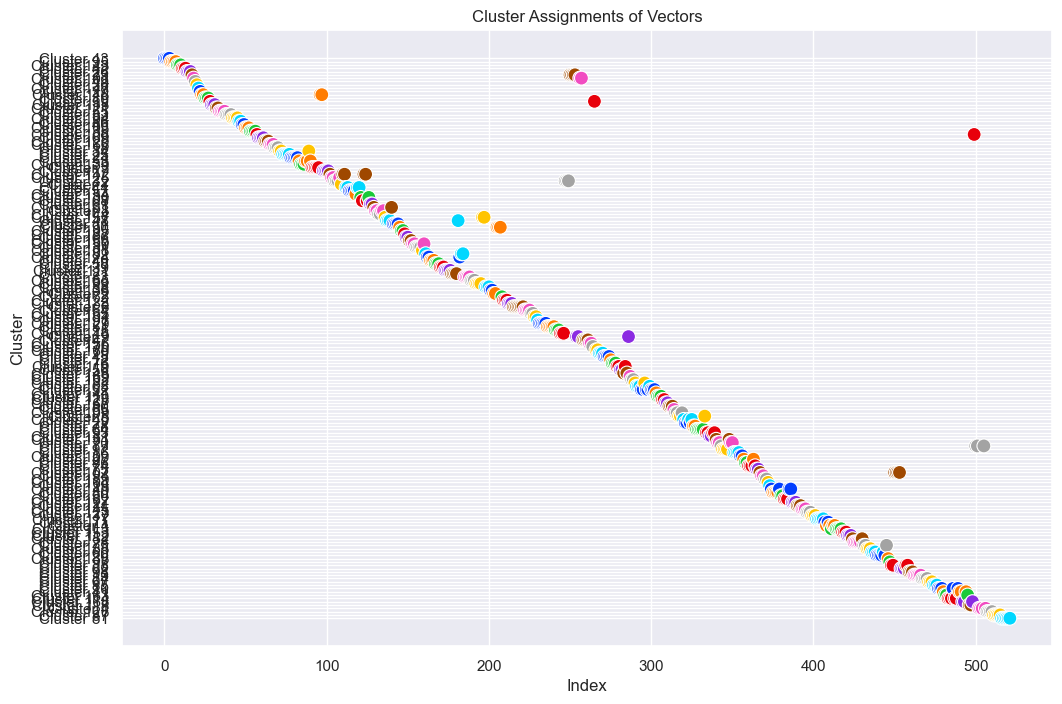

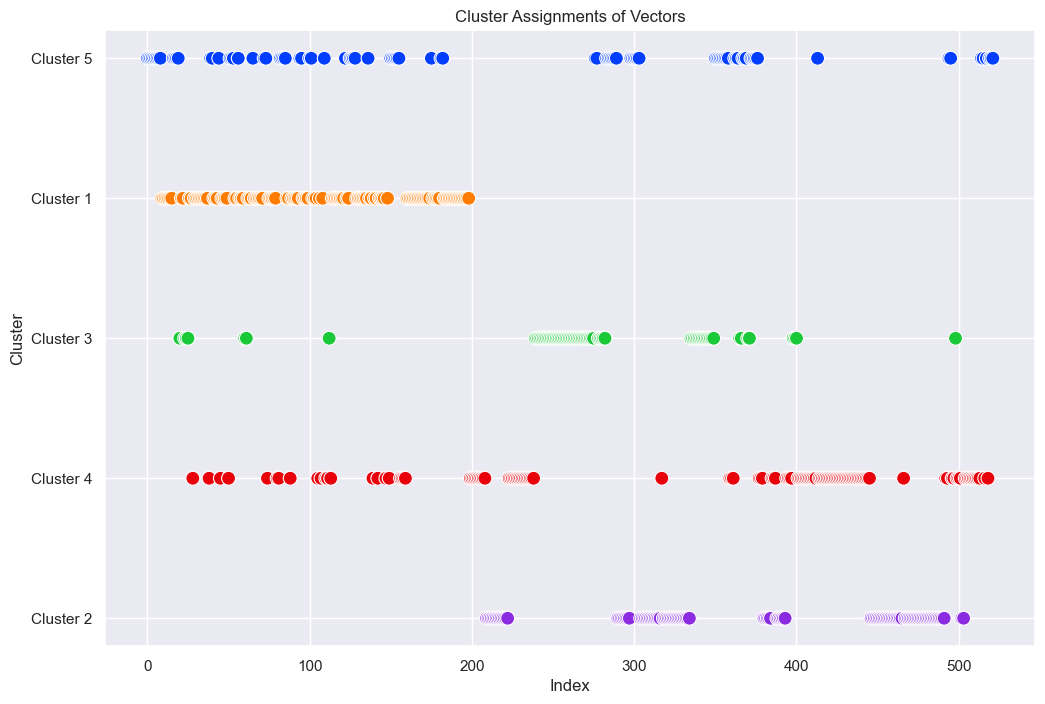

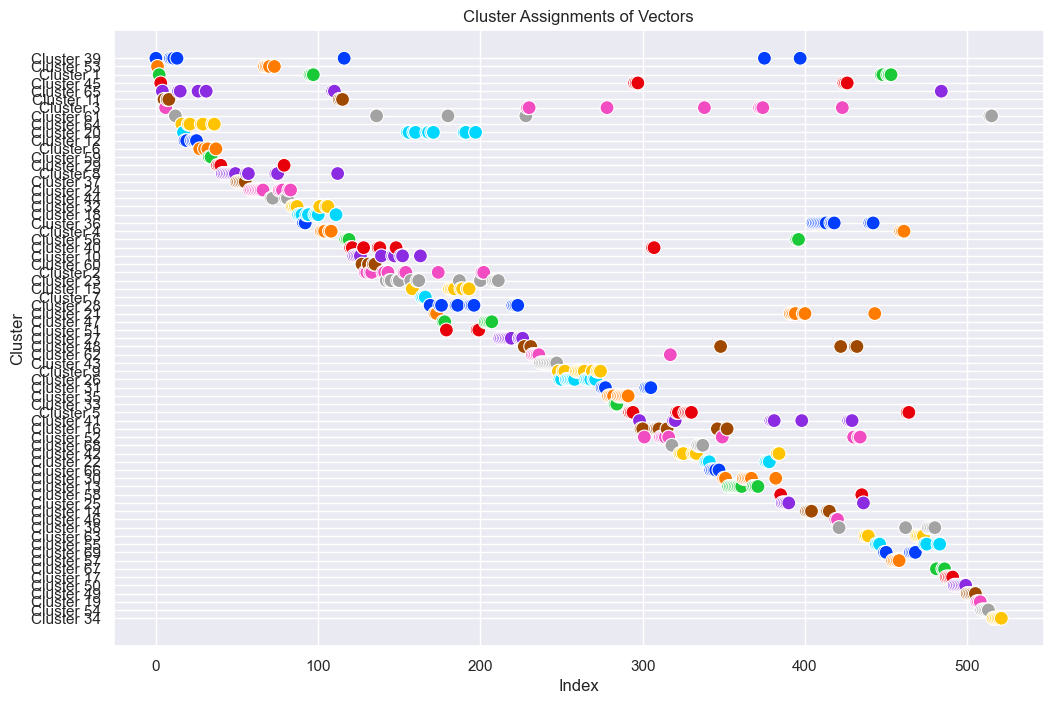

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the state from the previous code

# Create a list of cluster assignments for each vector
for k in range(0, No_chunks):
    cluster_labels = [f'Cluster {cluster + 1}' for cluster in clusters[k]]

    # Plotting the scatter plot
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=np.arange(len(chunk_embeddings[k])), y=cluster_labels, hue=cluster_labels, palette='bright', legend=None, s=100)
    plt.xlabel('Index')
    plt.ylabel('Cluster')
    plt.title('Cluster Assignments of Vectors')
    #plt.legend(title='Cluster')
    plt.show()

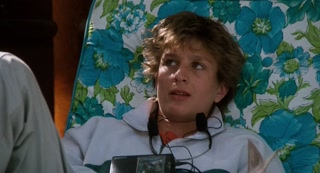

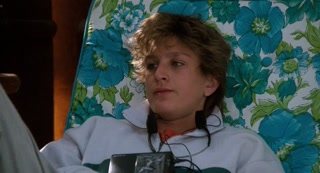

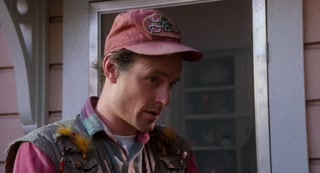

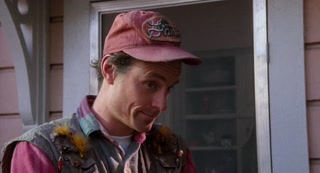

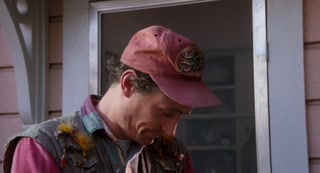

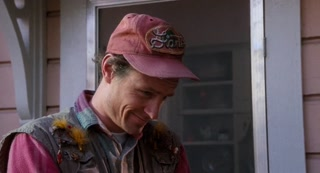

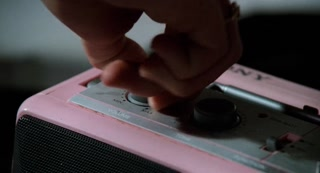

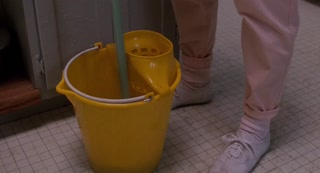

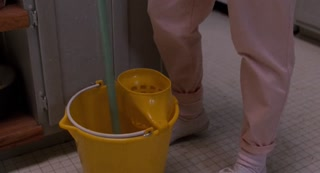

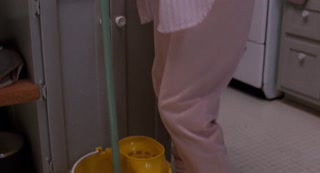

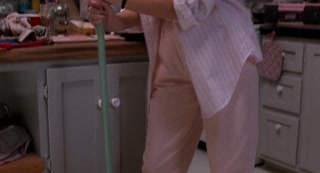

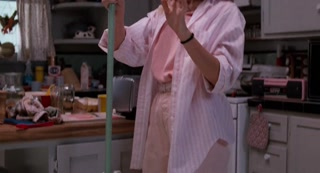

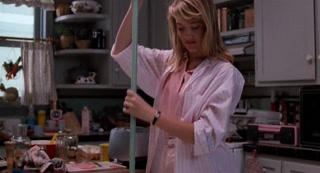

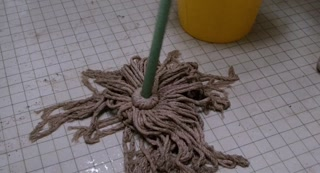

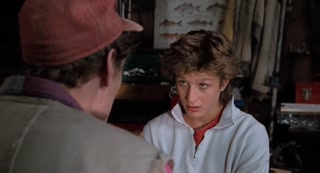

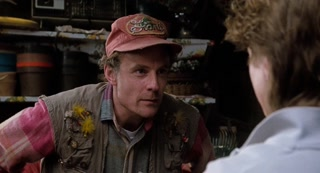

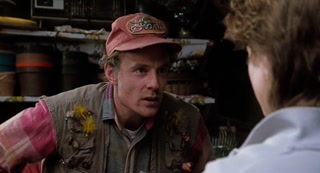

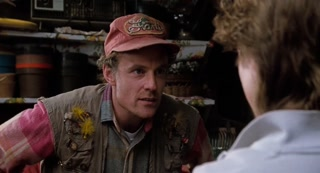

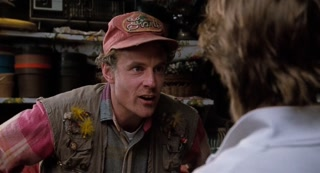

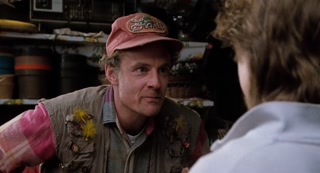

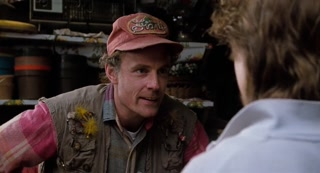

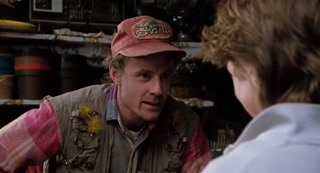

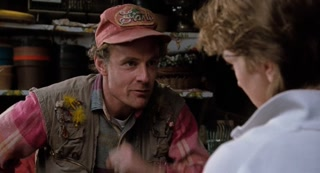

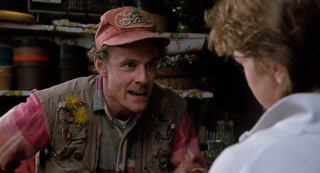

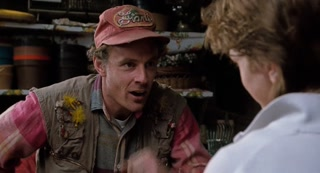

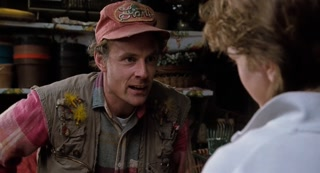

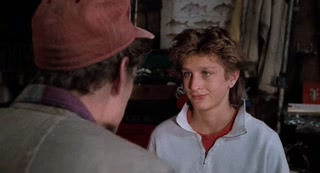

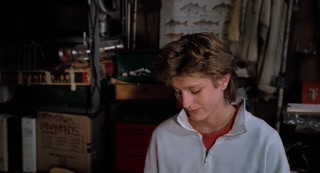

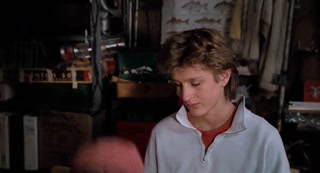

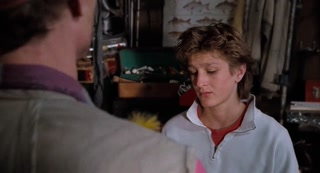

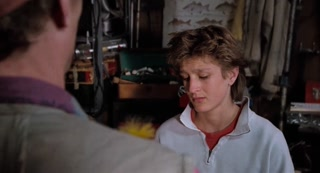

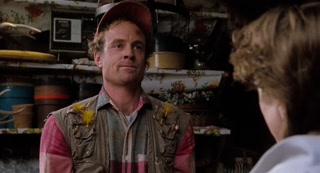

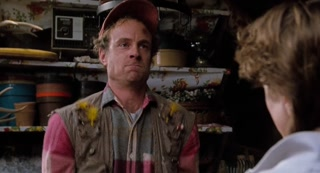

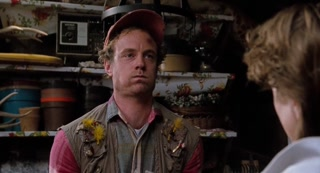

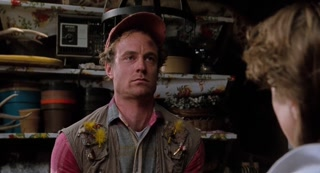

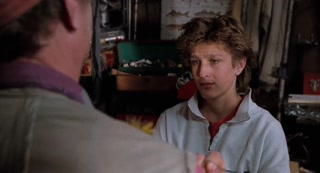

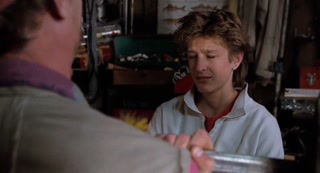

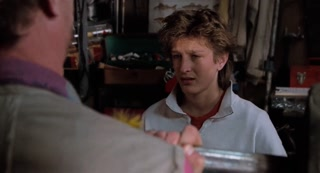

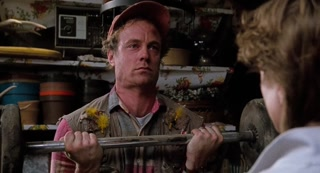

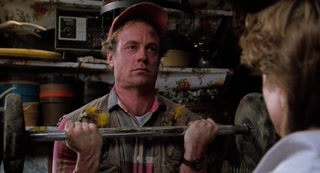

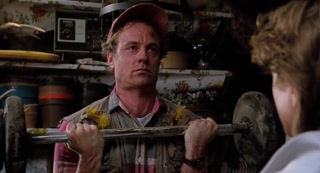

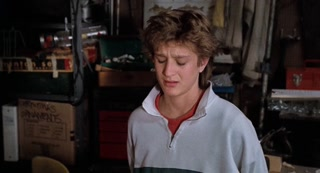

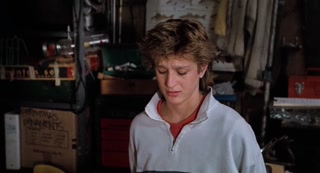

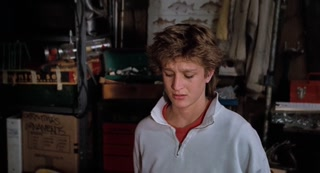

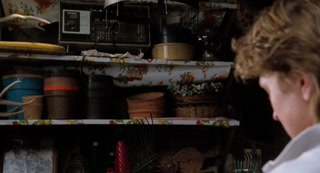

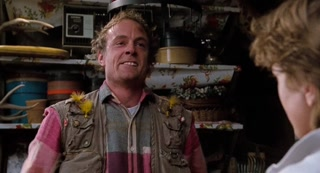

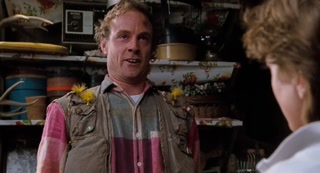

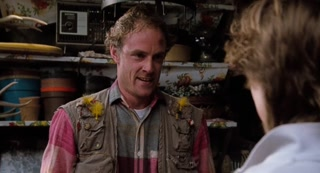

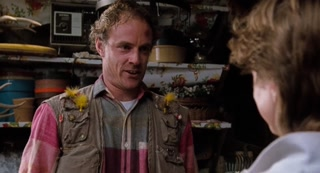

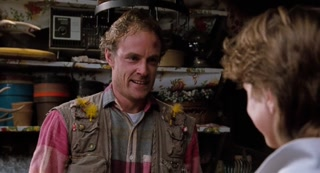

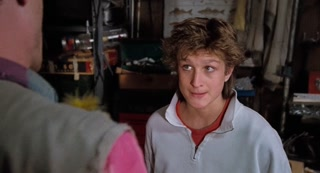

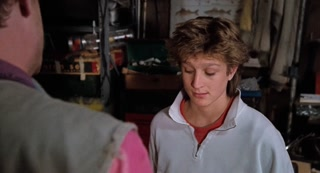

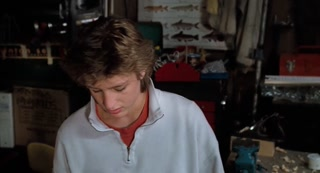

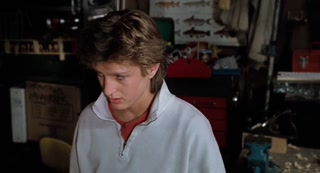

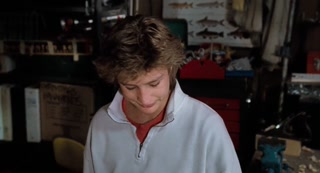

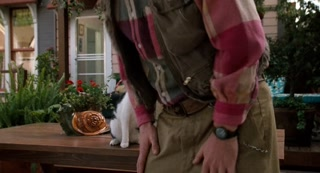

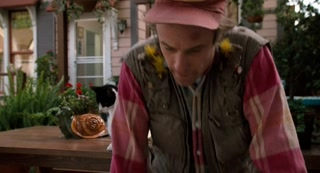

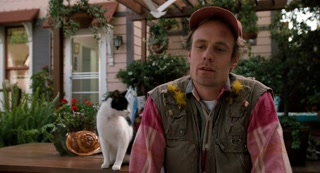

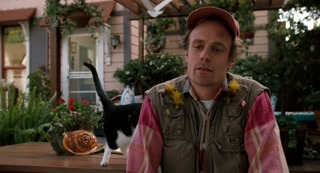

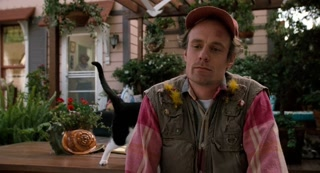

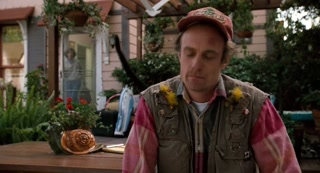

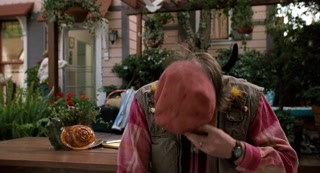

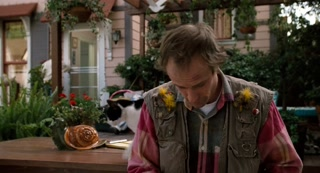

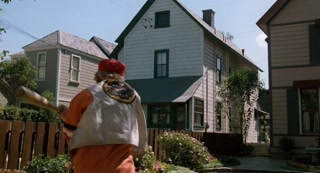

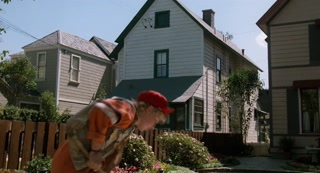

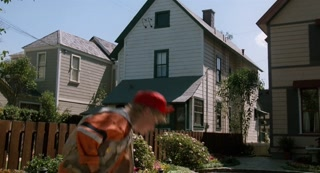

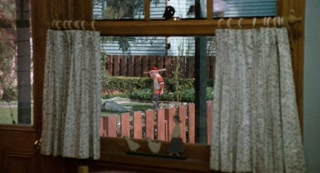

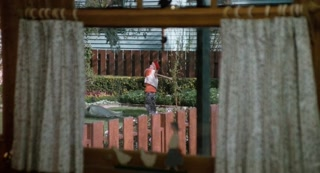

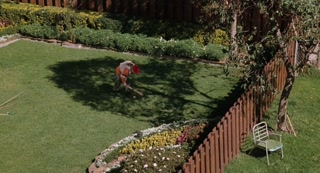

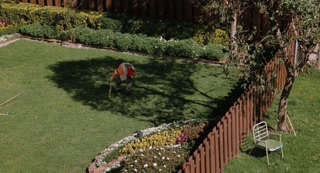

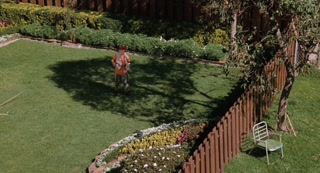

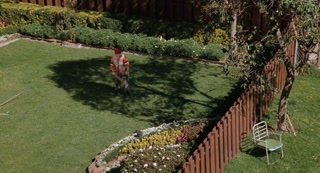

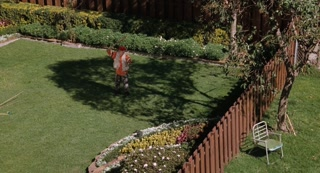

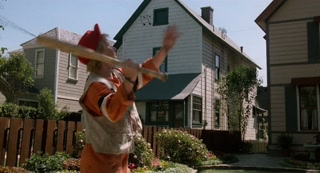

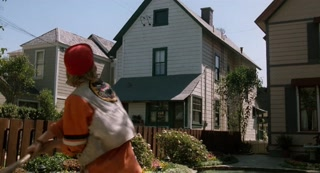

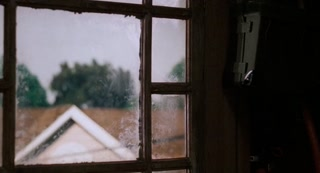

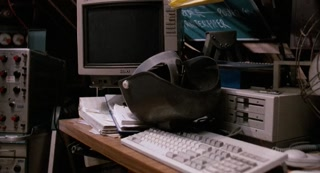

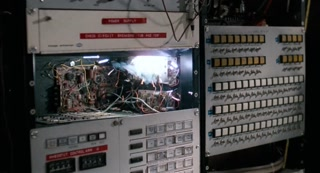

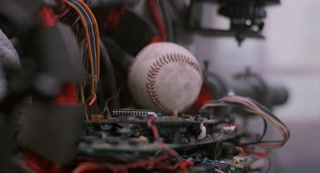

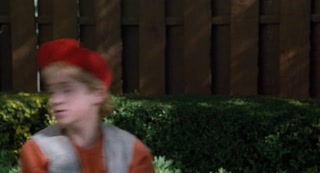

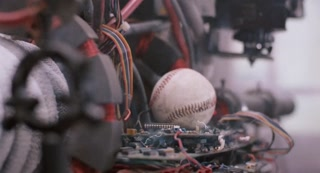

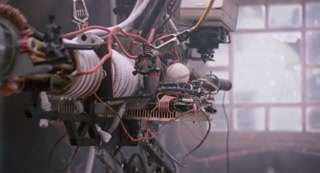

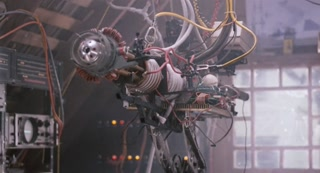

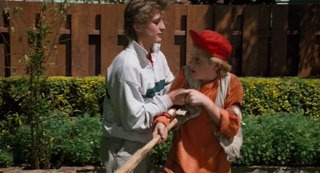

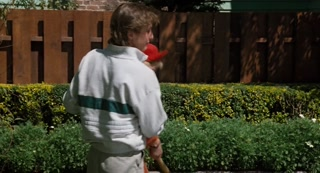

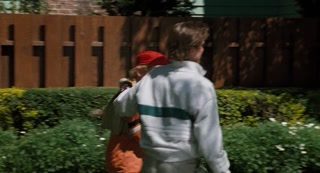

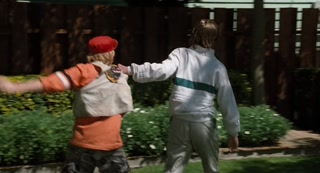

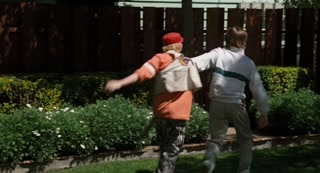

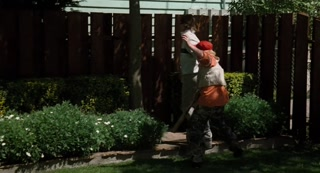

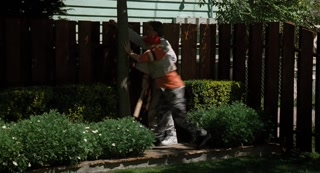

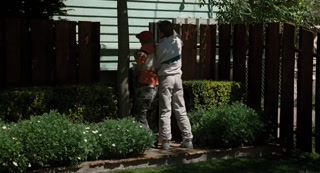

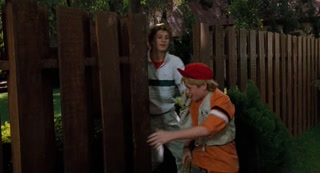

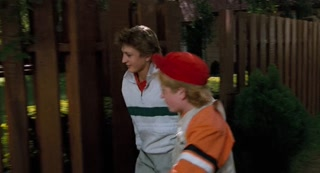

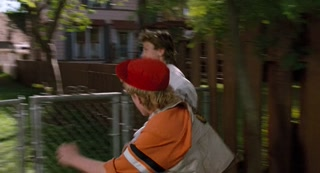

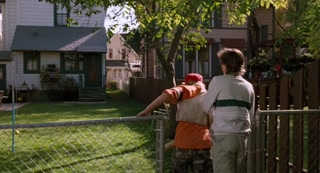

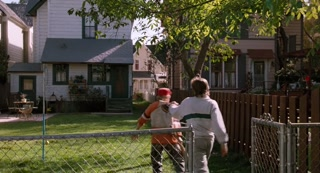

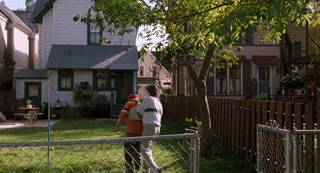

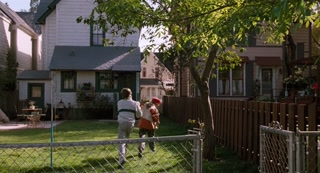

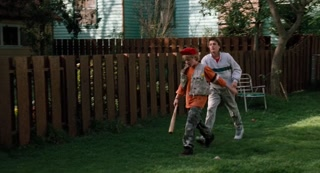

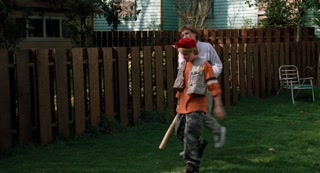

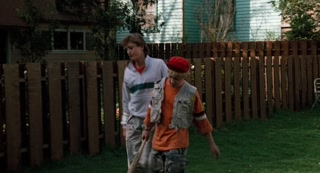

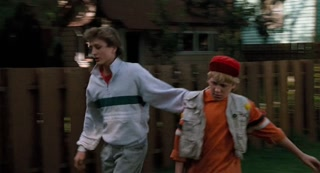

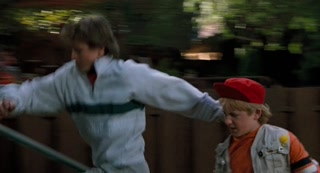

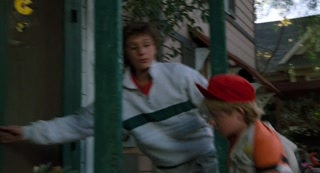

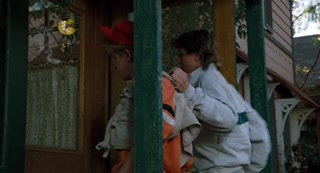

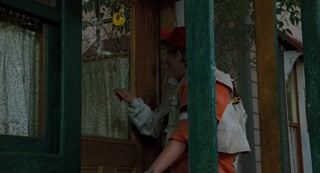

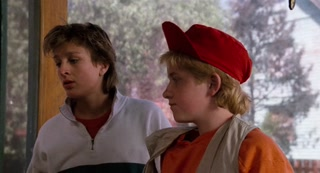

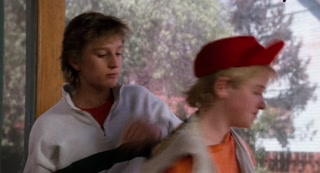

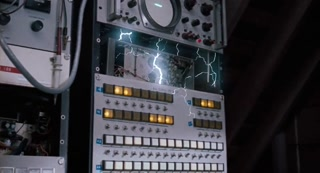

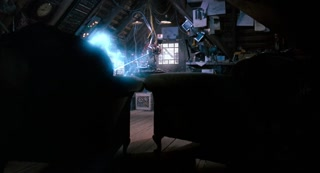

In [10]:
show_list = [1234,5049,786]
for i in cluster_indexes_list[8][1]:
    #print(embeddings[i])
    #print(i,sorted_indexes[0][i],chunk_movie_embeddings[0][i]["input"])
    image_path = image_root+chunk_movie_embeddings[1][i]["input"]
    # Display the image
    display(Image(filename=image_path))

# Film Description
<i>This section should cite and briefly describe the film.</i>

# Methods Summary
<i>This section should highlight methods you used in your exploratory analysis. You should include at least one clustering technique or develop another way to relate frames to other frames. you should also consider dimensionality reduction. 

# Hunches and Hypotheses
<i>This section should summarize the question that you asked about teh film taht could potentially be answered by exploratory analysis. You should ask at least three questions.</i>

Image used for RUSS T JR:
thumbnails_folder2large/thumbnail_1425.jpg


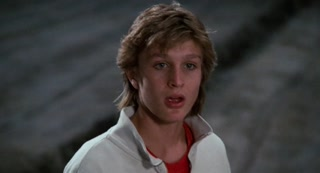

--------------------------------
Image used for RON T:
thumbnails_folder2large/thumbnail_3883.jpg


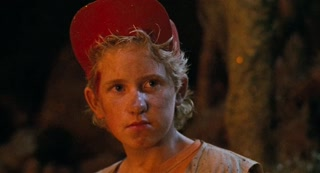

--------------------------------
Image used for AMY S:
thumbnails_folder2large/thumbnail_1446.jpg


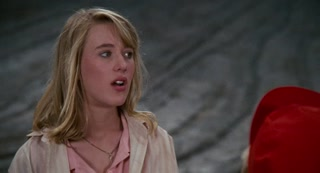

--------------------------------
Image used for NICK S:
thumbnails_folder2large/thumbnail_5383.jpg


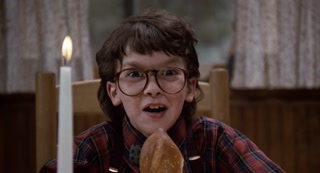

--------------------------------
Image used for QUARK:
thumbnails_folder2large/thumbnail_4827.jpg


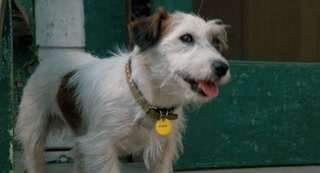

--------------------------------
Image used for MAE T:
thumbnails_folder2large/thumbnail_2534.jpg


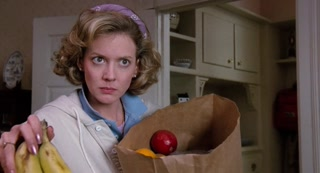

--------------------------------
Image used for DIANE S:
thumbnails_folder2large/thumbnail_1987.jpg


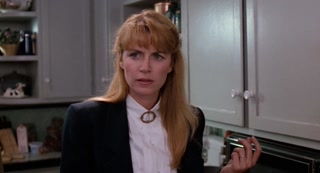

--------------------------------
Image used for WAYNE S:
thumbnails_folder2large/thumbnail_0487.jpg


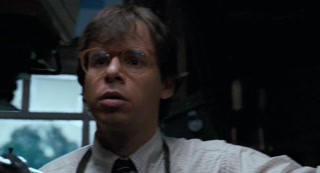

--------------------------------
Image used for RUSS T SR:
thumbnails_folder2large/thumbnail_5209.jpg


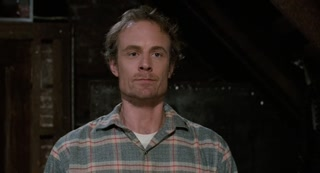

--------------------------------


In [114]:
## functions to be used in analysis
import pandas as pd

image_root = 'thumbnails_folder2large/'
goal_distance = 12.25

def euclidean_distance(array1, array2):
    # Convert the arrays to NumPy arrays
    array1_np = np.array(array1)
    array2_np = np.array(array2)
    
    # Calculate the Euclidean distance
    distance = np.linalg.norm(array1_np - array2_np)
    return distance


def displayImage(index):
    # Replace 'image_path.jpg' with the path to your image file
    image_path = image_root+moive_embeddings[index]["input"]
    print(image_path)
    # Display the image
    display(Image(filename=image_path))

characters = {"Russ_T_jr": 1424, "Ron_T": 3882, "Amy_S": 1445, "Nick_S": 5382, "Quark": 4826, 
        "Mae_T": 2533, "Diane_S": 1986, "Wayne_S": 486, "Russ_T_sr": 5208}

for character in characters:
    print(f'Image used for {character.upper().replace("_", " ")}:')
    displayImage(characters[character])
    print('--------------------------------')
    # print(image+" : "+str(characters[image]))
    # image_path = image_root+moive_embeddings[characters[image]]["input"]
    # display(Image(filename=image_path))

<u>Q1. Which characters show up the most in which chunk?</u>

{0: {'Russ_T_jr': 4, 'Ron_T': 8, 'Amy_S': 30, 'Nick_S': 26, 'Quark': 17, 'Mae_T': 2, 'Diane_S': 9, 'Wayne_S': 22, 'Russ_T_sr': 16}, 1: {'Russ_T_jr': 67, 'Ron_T': 12, 'Amy_S': 14, 'Nick_S': 6, 'Quark': 1, 'Mae_T': 0, 'Diane_S': 10, 'Wayne_S': 2, 'Russ_T_sr': 45}, 2: {'Russ_T_jr': 40, 'Ron_T': 8, 'Amy_S': 25, 'Nick_S': 5, 'Quark': 17, 'Mae_T': 0, 'Diane_S': 0, 'Wayne_S': 28, 'Russ_T_sr': 0}, 3: {'Russ_T_jr': 36, 'Ron_T': 24, 'Amy_S': 16, 'Nick_S': 19, 'Quark': 6, 'Mae_T': 7, 'Diane_S': 59, 'Wayne_S': 10, 'Russ_T_sr': 3}, 4: {'Russ_T_jr': 2, 'Ron_T': 8, 'Amy_S': 10, 'Nick_S': 1, 'Quark': 0, 'Mae_T': 7, 'Diane_S': 10, 'Wayne_S': 23, 'Russ_T_sr': 0}, 5: {'Russ_T_jr': 11, 'Ron_T': 30, 'Amy_S': 10, 'Nick_S': 20, 'Quark': 0, 'Mae_T': 8, 'Diane_S': 2, 'Wayne_S': 1, 'Russ_T_sr': 6}, 6: {'Russ_T_jr': 5, 'Ron_T': 10, 'Amy_S': 4, 'Nick_S': 0, 'Quark': 6, 'Mae_T': 8, 'Diane_S': 32, 'Wayne_S': 1, 'Russ_T_sr': 26}, 7: {'Russ_T_jr': 33, 'Ron_T': 12, 'Amy_S': 3, 'Nick_S': 4, 'Quark': 0, 'Mae_T': 10, 'Di

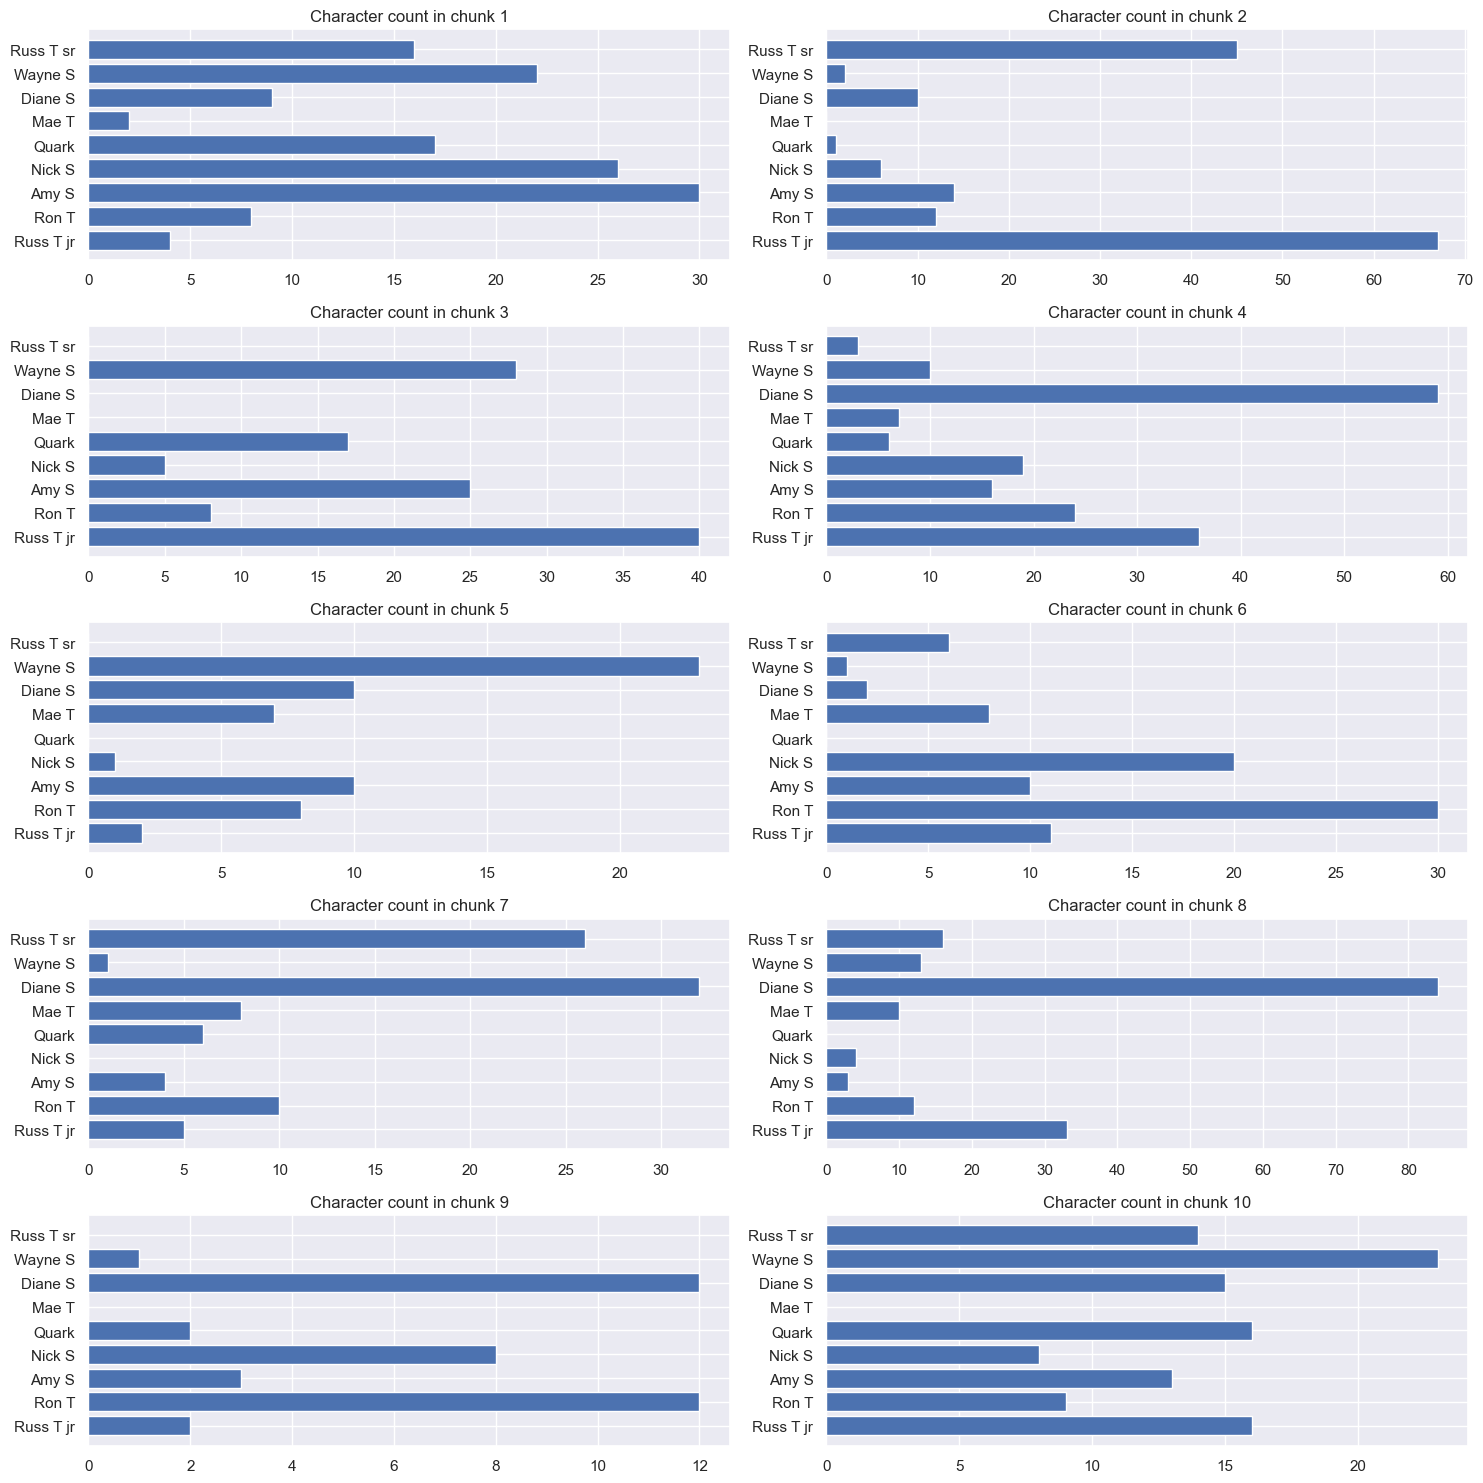

Russ_T_jr: [4, 67, 40, 36, 2, 11, 5, 33, 2, 16]


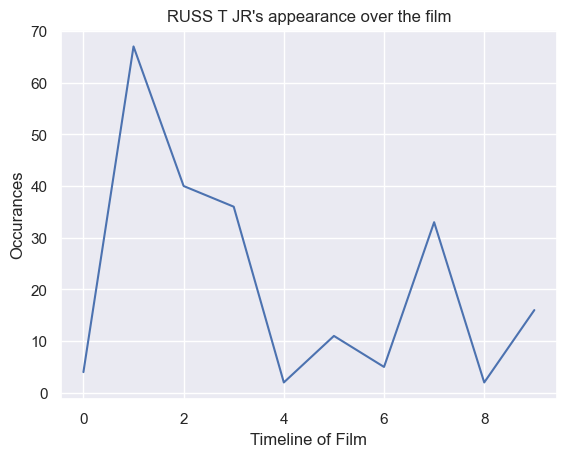

Ron_T: [8, 12, 8, 24, 8, 30, 10, 12, 12, 9]


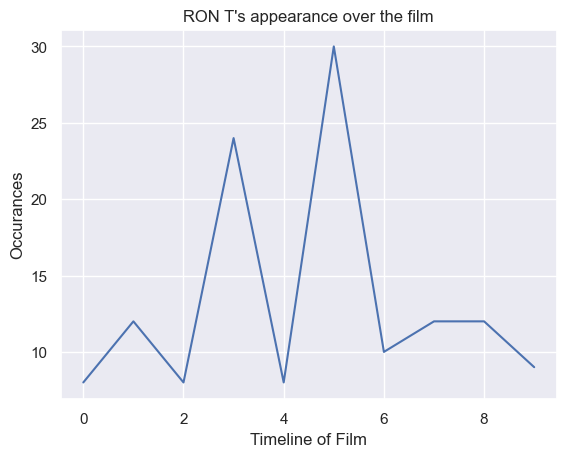

Amy_S: [30, 14, 25, 16, 10, 10, 4, 3, 3, 13]


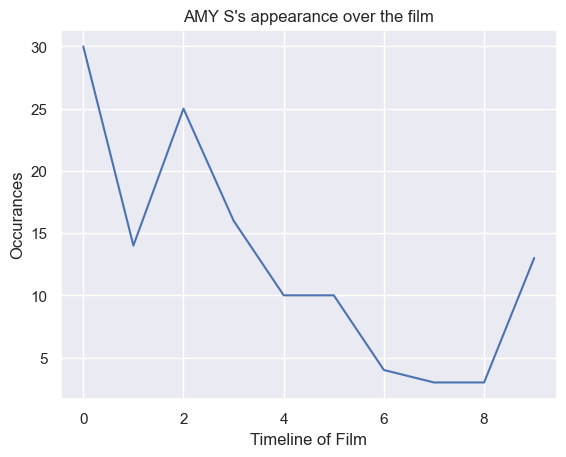

Nick_S: [26, 6, 5, 19, 1, 20, 0, 4, 8, 8]


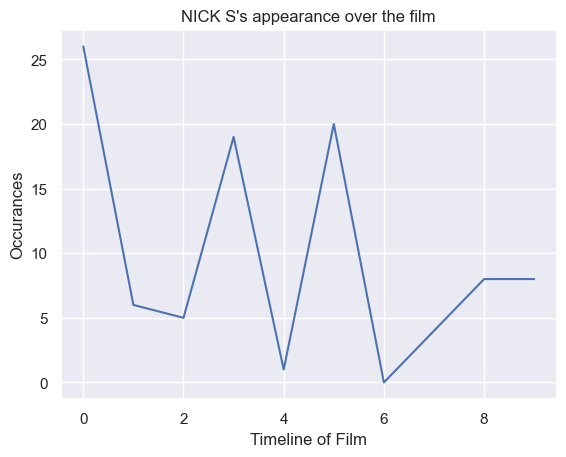

Quark: [17, 1, 17, 6, 0, 0, 6, 0, 2, 16]


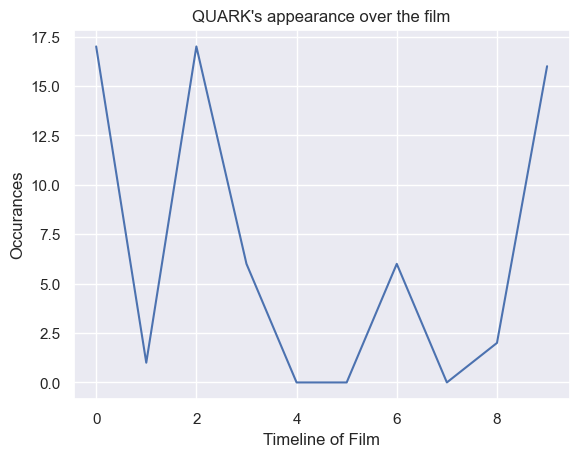

Mae_T: [2, 0, 0, 7, 7, 8, 8, 10, 0, 0]


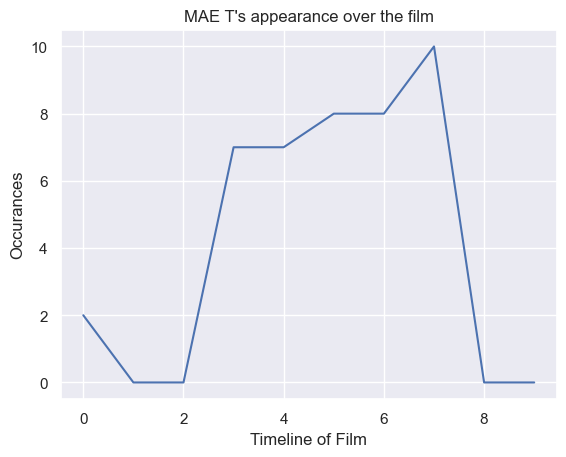

Diane_S: [9, 10, 0, 59, 10, 2, 32, 84, 12, 15]


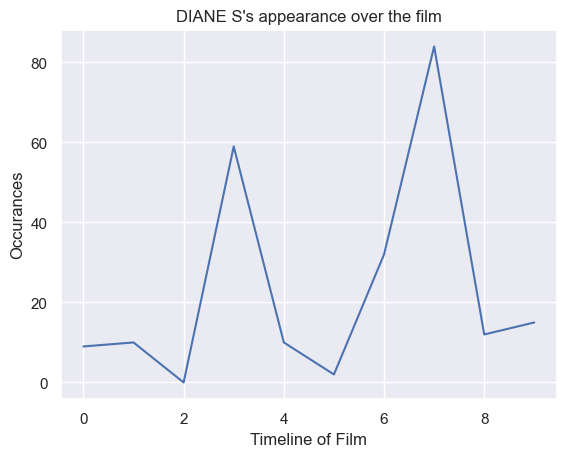

Wayne_S: [22, 2, 28, 10, 23, 1, 1, 13, 1, 23]


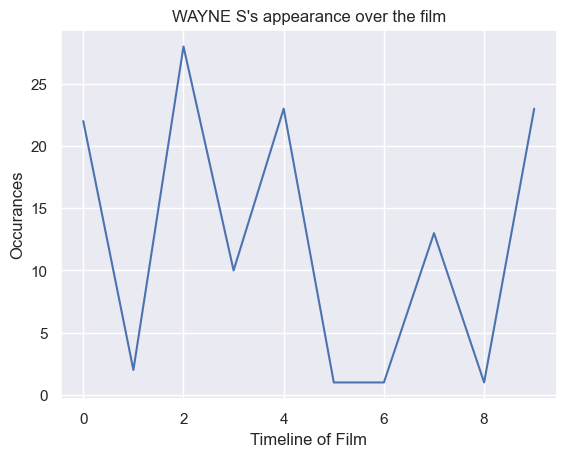

Russ_T_sr: [16, 45, 0, 3, 0, 6, 26, 16, 0, 14]


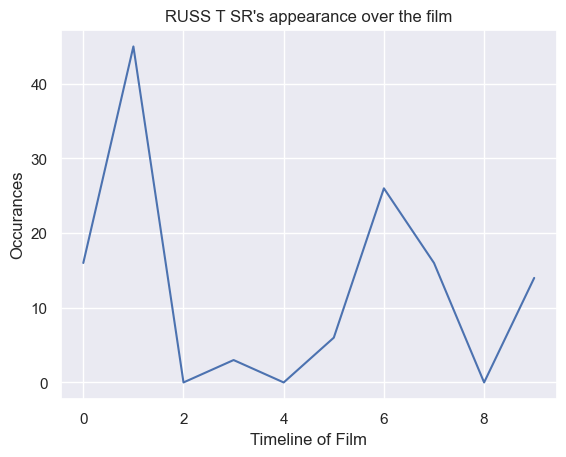

In [115]:
import numpy as np
import matplotlib.pyplot as plt

'''GOAL: 
* find which clusters the main characters appear the most in
* find which characters show up the most in the film

Aglo:
1. provide images / embeddings of main characters
2. write func to compare embedding with provided image
3. loop through all clusters and compare each to the main characters
'''

#provide images / embeddings of main characters
# characters = {'Nick Szalinski': 793, 'Wayne Szalinski': 1595, 'Ron Thompson': 861, 
#               'Amy Szalinski': 1423, 'Russ Thompson Jr': 1424, 'Quark': 4826, 
#               'Russ Thompson Sr': 2958, 'Gloria Forrester': 2984, 'Auntie': 3230, 'Mae Thompson': 3448 }

character_chunks = {}
#loop through each character
for chunk in range(0, No_chunks):
    # store character appearances per chunk
    character_appearances = {}
    for character in characters:
        character_index = characters[character]
        target = moive_embeddings[character_index]

        # get distances for each embedding
        distances = {}
        # for emb in moive_embeddings:
        for emb in chunk_movie_embeddings[chunk]:
            current_dist = euclidean_distance(emb["embedding"], target["embedding"])
            if current_dist < goal_distance:
                distances[moive_embeddings.index(emb)] = current_dist
        
        # sort it
        distances = dict(sorted(distances.items(), key=lambda item: item[1]))

        character_appearances[character] = len(distances)
    character_chunks[chunk] = character_appearances
print(character_chunks)


fig, axs = plt.subplots(5, 2, figsize=(15, 15))
axs = axs.flatten()

for i, (chunk, characters) in enumerate(character_chunks.items()):
    characters, counts = zip(*characters.items())
    
    axs[i].barh([character.replace('_', ' ') for character in characters], counts)
    axs[i].set_title(f'Character count in chunk {chunk + 1}')

plt.tight_layout()
plt.show()

appearances_over_chunks = {}
for character in character_chunks[0]:
    character_over_chunk = [character_chunks[chunk][character] for chunk in range(0, No_chunks)]
    appearances_over_chunks[character] = character_over_chunk

for character in appearances_over_chunks:
    print(f'{character}: {appearances_over_chunks[character]}')
    plt.plot(appearances_over_chunks[character])
    plt.title(f'{character.upper().replace("_", " ")}\'s appearance over the film')
    plt.ylabel('Occurances')
    plt.xlabel('Timeline of Film')
    plt.show()

<u>Q2 Possible Theme Detection</u>

<u>Q3. Each kid is more likely to show up with another kid than with an adult.</u>

In [88]:
#correlate = {"Russ_T_jr": , "Ron_T": , "Amy_S": , "Nick_S": , 
#"Mae_T": , "Diane_S": , "Wayne_S": , "Russ_T_sr": }
df = pd.DataFrame()
df["Russ_T_jr"] = 0
df["Ron_T"] = 0
df["Amy_S"] = 0
df["Nick_S"] = 0
df["Mae_T"] = 0
df["Wayne_S"] = 0
df["Diane_S"] = 0
df["Russ_T_sr"] = 0
df["Quark"] = 0
print(df.head())

for t in range(len(moive_embeddings[163:5386])):
    #print(image+" : "+str(t+163))
    image_path = image_root+moive_embeddings[t+163]["input"]
    #display(Image(filename=image_path))
    
    array1 = moive_embeddings[t+163]["embedding"]
    df2 = pd.DataFrame({"Russ_T_jr": [0], "Ron_T": [0], "Amy_S": [0], "Nick_S": [0], "Mae_T": [0], "Diane_S": [0], "Wayne_S": [0], "Russ_T_sr": [0], "Quark": [0]})
    df = pd.concat([df, df2], ignore_index = True)
    for l in characters:
        #print(characters[l])
        image_path2 = image_root+moive_embeddings[characters[l]]["input"]
        array2 = moive_embeddings[characters[l]]["embedding"]

        # Calculate Euclidean distance
        distance = euclidean_distance(array1, array2)
        if distance <= 12 and distance != 0:
            #display(Image(filename=image_path))
            df.at[len(df)-1, l] = 1
            #print(df.iloc[[len(df)-1]])
            #print(l+" : Euclidean distance between array1 and array2:", distance)

Empty DataFrame
Columns: [Russ_T_jr, Ron_T, Amy_S, Nick_S, Mae_T, Wayne_S, Diane_S, Russ_T_sr, Quark]
Index: []


5223
175
88
70
59


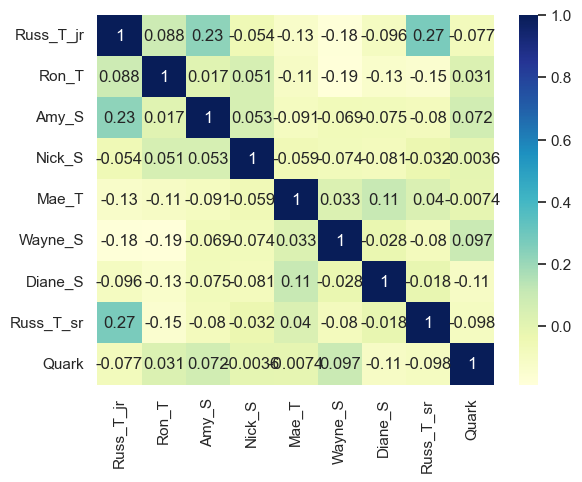

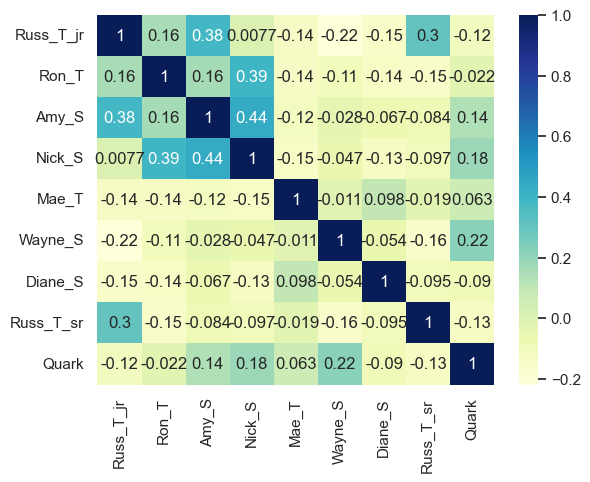

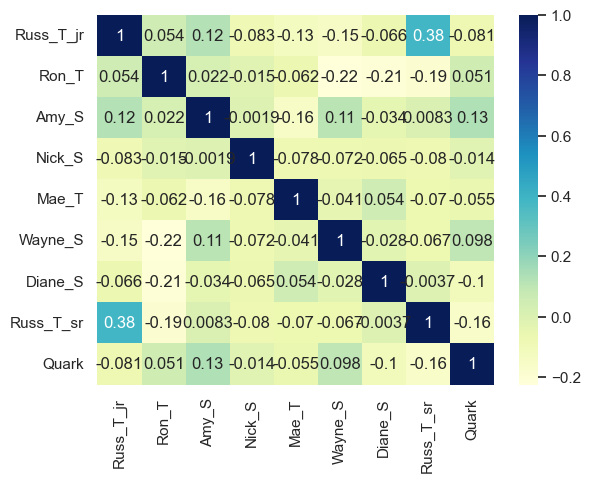

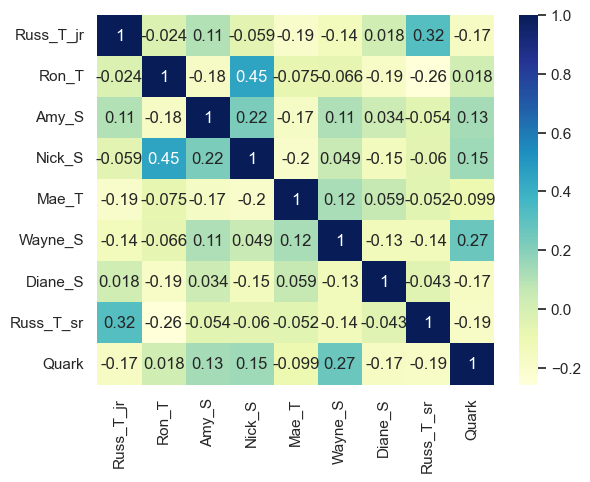

In [93]:
print(len(df))
print(len(df.groupby(df.index//30).agg('mean')))
print(len(df.groupby(df.index//60).agg('mean')))
print(len(df.groupby(df.index//75).agg('mean')))
print(len(df.groupby(df.index//90).agg('mean')))

corr_matrix = df.groupby(df.index//60).agg('mean').corr()
#corr_matrix = df.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()
corr_matrix = df.groupby(df.index//75).agg('mean').corr()
#corr_matrix = df.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()
corr_matrix = df.groupby(df.index//90).agg('mean').corr()
#corr_matrix = df.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()
corr_matrix = df.groupby(df.index//120).agg('mean').corr()
#corr_matrix = df.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

# Results and Interpretations

<i>This section should include a summary of your findings. Describe the extent and results of your goal in answering questions.</i>

# Reflection
<i>Reflect on your process of analysis. What worked well and did not work well? Describe the limitations of the work and describe what you would work on with more time.</i>